# <font color='blue'>CONTROLE INDUSTRIAL</font>
# <font color='blue'>Análise Paradas de vapor</font>
</p>
p>
p>


In [1]:
#Importaçãoo de biblioecas para o trabalho

import math
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Criamos uma lista para identificar valores ausentes
# Bad Data, por padrao de extração do pins são meus valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "<Bad Data>"]

In [3]:
#carregando a planilha e classificando os valores ausentes

df = pd.read_csv('paradasvapor.csv',na_values=lista_labels_valores_ausentes)


In [4]:
# verificando o tamanho da minha planilha
df.shape

(500003, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500003 entries, 0 to 500002
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TimeStamp         500003 non-null  object 
 1   Time Zone         500003 non-null  object 
 2   G200AUT_PT325005  461960 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [6]:
# a coluna Time Zone, nao tem valor pra essa analise, logo vou exluir
df.drop(columns = ['Time Zone'], inplace = True)

In [7]:
#adição de modulos complementares que criei para tratar dados
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [8]:
df.head()

,TimeStamp,G200AUT_PT325005
0,01/01/2021 06:00:00,20.97
1,01/01/2021 06:05:15,20.94
2,01/01/2021 06:10:30,20.94
3,01/01/2021 06:15:46,20.94
4,01/01/2021 06:21:01,20.94


## Análise Exploratoria dos Dados

In [9]:
# Informação da planilha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500003 entries, 0 to 500002
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TimeStamp         500003 non-null  object 
 1   G200AUT_PT325005  461960 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [10]:
# A coluna TimeStamp esta com o tipo de dados de objeto, eu preciso transforma ela em data
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

In [11]:
#verificando se a transformação foi bem sucedida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500003 entries, 0 to 500002
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TimeStamp         500003 non-null  datetime64[ns]
 1   G200AUT_PT325005  461960 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 MB


In [12]:
# Segregando a data em dia, mes e ano
df['dia'] = df['TimeStamp'].dt.day
df['hora'] = df['TimeStamp'].dt.time
df['ano'] = df['TimeStamp'].dt.year
df['mes'] = df['TimeStamp'].dt.month

In [13]:
#remover a coluna timestamp ja que ela nao faz mais sentido
df.drop(columns = ['TimeStamp'], inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500003 entries, 0 to 500002
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   G200AUT_PT325005  461960 non-null  float64
 1   dia               500003 non-null  int32  
 2   hora              500003 non-null  object 
 3   ano               500003 non-null  int32  
 4   mes               500003 non-null  int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 13.4+ MB


In [15]:

df['hora'] = df['hora'].apply(lambda x: str(x)[:5])



In [16]:
#contagem de valores ausentes
df.isna().sum()

G200AUT_PT325005    38043
dia                     0
hora                    0
ano                     0
mes                     0
dtype: int64

In [17]:
# porcentagem de valores ausentes da minha variavel alvo 
# existem algumas tecnicas para esse tratamento, como estou inseguro sobre os valores que o tratamento vai 
# apresentar para os dias de parada eu vou tratar como exclusão
func_calc_percentual_valores_ausentes(df)

O dataset tem 1.52 % de valores ausentes.


In [18]:
#  Excluindo Valores ausentes
df=df.dropna()

In [19]:
#Valores tratatos
df.isna().sum()

G200AUT_PT325005    0
dia                 0
hora                0
ano                 0
mes                 0
dtype: int64

## Analise Descritiva dos dados 

In [20]:
# descrevendo o comportamento dos dados
df.describe()

,G200AUT_PT325005,dia,ano,mes
count,461960.000000,461960.000000,461960.000000,461960.000000
mean,19.871940,15.529680,2022.709531,5.352708
std,3.500534,8.742587,1.163624,3.275431
min,0.000000,1.000000,2021.000000,1.000000
25%,19.680000,8.000000,2022.000000,3.000000
50%,20.190000,15.000000,2023.000000,5.000000
75%,20.670000,23.000000,2024.000000,8.000000
max,553.610000,31.000000,2024.000000,12.000000


In [21]:
# como podemos ver pelo valor max 553, esses dados provavelmente tem outliers
# vou printar um boxplot para validar essa informação

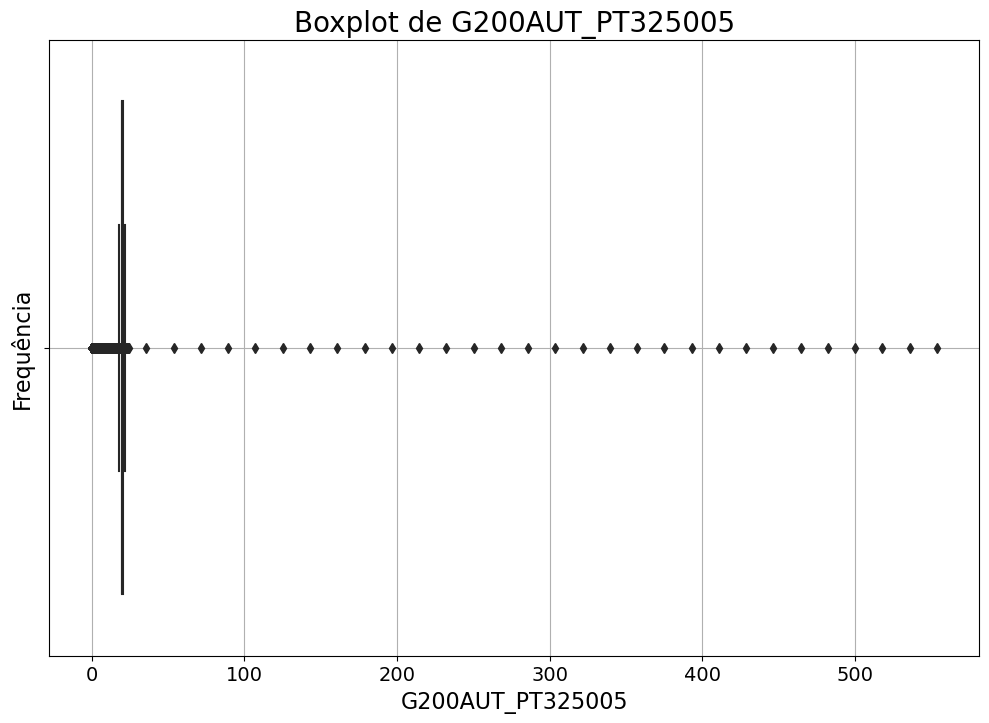

In [22]:


# Aumenta o tamanho da figura
plt.figure(figsize=(12, 8))

# Plota o boxplot
sns.boxplot(x=df['G200AUT_PT325005'], color="green")

# Define o título do gráfico e os rótulos dos eixos com um tamanho de fonte maior
plt.title('Boxplot de G200AUT_PT325005', fontsize=20)
plt.xlabel('G200AUT_PT325005', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

# Aumenta o tamanho dos rótulos dos ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adiciona grades
plt.grid(True)

# Mostra o gráfico
plt.show()



In [23]:
# como podemos ver temos muitos valores acima do que realemente aguenta a linha de vapor, preciso tratar esses dados
# como padrao de tratamento, irei utilizar diferenla interquartis


In [24]:
# Cria o objeto trata outlier
trata_outlier = TrataOutlier(df)

In [25]:
# Lista de colunas float64
lista_colunas = df.select_dtypes('float64').columns.tolist()

In [26]:
# Visão geral dos outliers
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,G200AUT_PT325005
Min,0.0
Q1,19.68
Median,20.19
Q3,20.67
Max,553.61
IQR,0.99
Lower fence,18.195
Upper fence,22.155
Skew,59.12716
Num_Outliers,12816


In [27]:
# vou excluir valores maiores que meu Q3, temos:
df = df[df['G200AUT_PT325005'] <= 20.67]



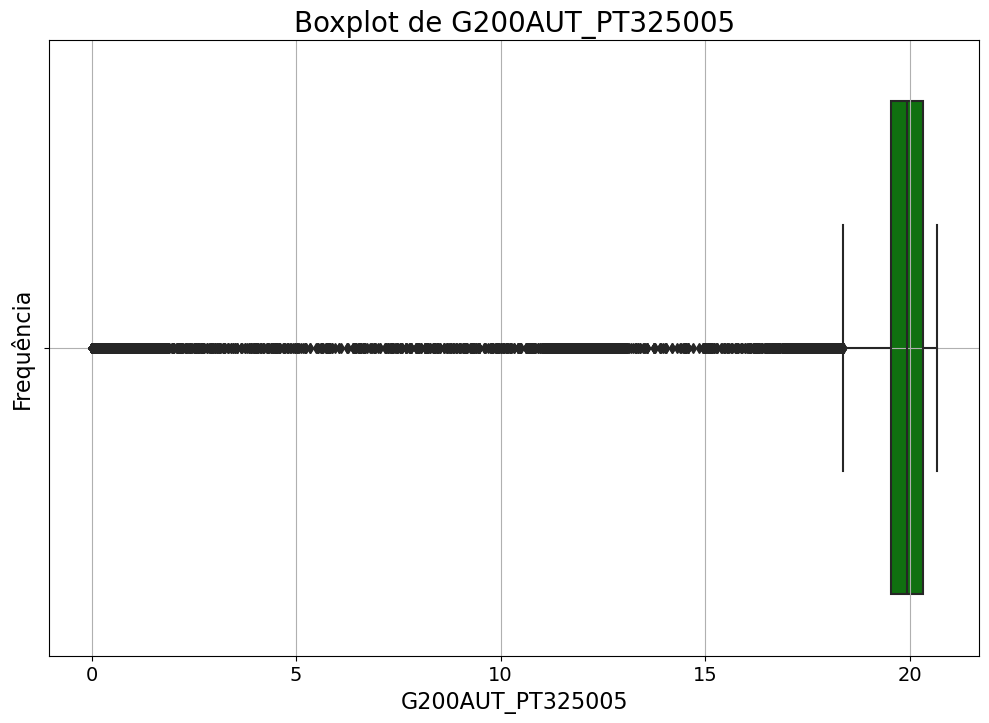

In [28]:

# Aumenta o tamanho da figura
plt.figure(figsize=(12, 8))

# Plota o boxplot
sns.boxplot(x=df['G200AUT_PT325005'], color="green")

# Define o título do gráfico e os rótulos dos eixos com um tamanho de fonte maior
plt.title('Boxplot de G200AUT_PT325005', fontsize=20)
plt.xlabel('G200AUT_PT325005', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

# Aumenta o tamanho dos rótulos dos ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adiciona grades
plt.grid(True)

# Mostra o gráfico
plt.show()


In [29]:
#agora que nossos dados foram tratados na parte superior a Q3 precisamos encontrar qual valor faz sentido 
#cortar na parte inferior, tento em vista que meu q1 é: 19.54
# Cria o objeto trata outlier
trata_outlier = TrataOutlier(df)
# Lista de colunas float64
lista_colunas = df.select_dtypes('float64').columns.tolist()
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,G200AUT_PT325005
Min,0.0
Q1,19.54
Median,19.94
Q3,20.32
Max,20.67
IQR,0.78
Lower fence,18.37
Upper fence,21.49
Skew,-6.010683
Num_Outliers,12827


In [30]:
# vou pegar os dados do dataframe antigo e passar para um df novo 
df_new = df[df['G200AUT_PT325005'] < 14]


In [31]:
df_new.describe()

,G200AUT_PT325005,dia,ano,mes
count,12169.000000,12169.000000,12169.000000,12169.000000
mean,6.903876,11.221382,2023.699482,1.748213
std,5.701015,4.595806,0.744253,2.364760
min,0.000000,1.000000,2021.000000,1.000000
25%,0.470000,8.000000,2024.000000,1.000000
50%,11.620000,11.000000,2024.000000,1.000000
75%,12.170000,14.000000,2024.000000,1.000000
max,13.970000,31.000000,2024.000000,12.000000


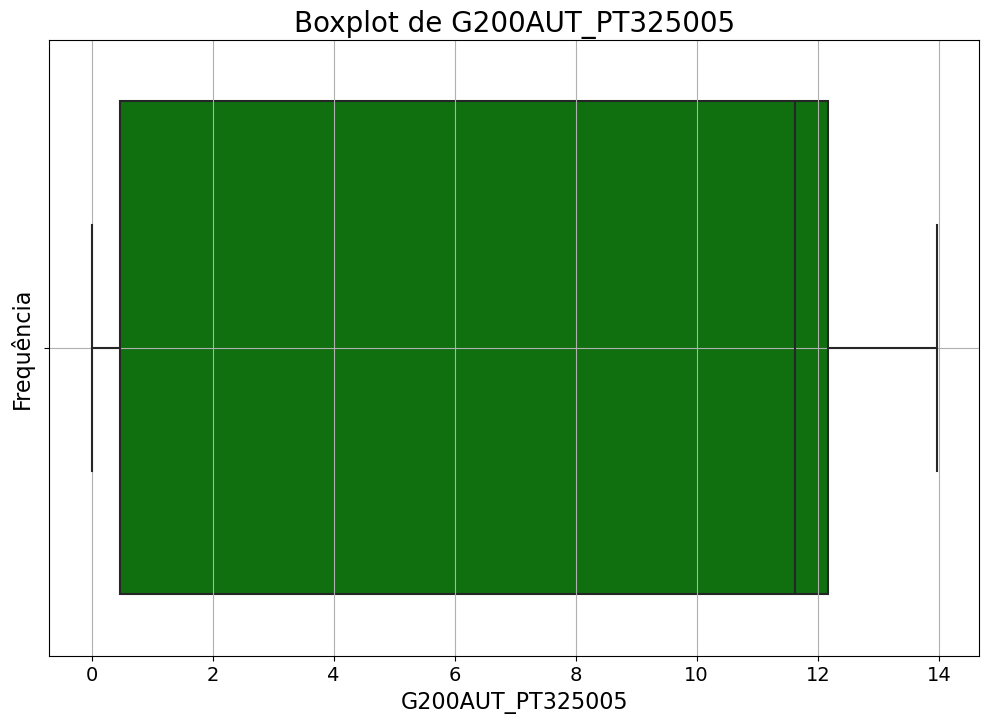

In [32]:
# Aumenta o tamanho da figura
plt.figure(figsize=(12, 8))

# Plota o boxplot
sns.boxplot(x=df_new['G200AUT_PT325005'], color="green")

# Define o título do gráfico e os rótulos dos eixos com um tamanho de fonte maior
plt.title('Boxplot de G200AUT_PT325005', fontsize=20)
plt.xlabel('G200AUT_PT325005', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

# Aumenta o tamanho dos rótulos dos ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adiciona grades
plt.grid(True)

# Mostra o gráfico
plt.show()


In [33]:
# os dados do df_new nao apresentam outliers para tratarmos e sua distribuição é bem consistente 
#Assim vou usar a média como corte para o nosso dataframe principal

In [34]:
df1 = df[df['G200AUT_PT325005'] <= 14]

In [35]:
df1 = df1[df1['G200AUT_PT325005'] >= 5.701015]

In [36]:
df1.describe()

,G200AUT_PT325005,dia,ano,mes
count,6737.000000,6737.000000,6737.000000,6737.000000
mean,11.973819,11.595369,2023.954282,1.097818
std,0.876366,2.342895,0.323266,0.838905
min,5.740000,1.000000,2021.000000,1.000000
25%,11.890000,10.000000,2024.000000,1.000000
50%,12.120000,11.000000,2024.000000,1.000000
75%,12.340000,13.000000,2024.000000,1.000000
max,13.970000,31.000000,2024.000000,12.000000


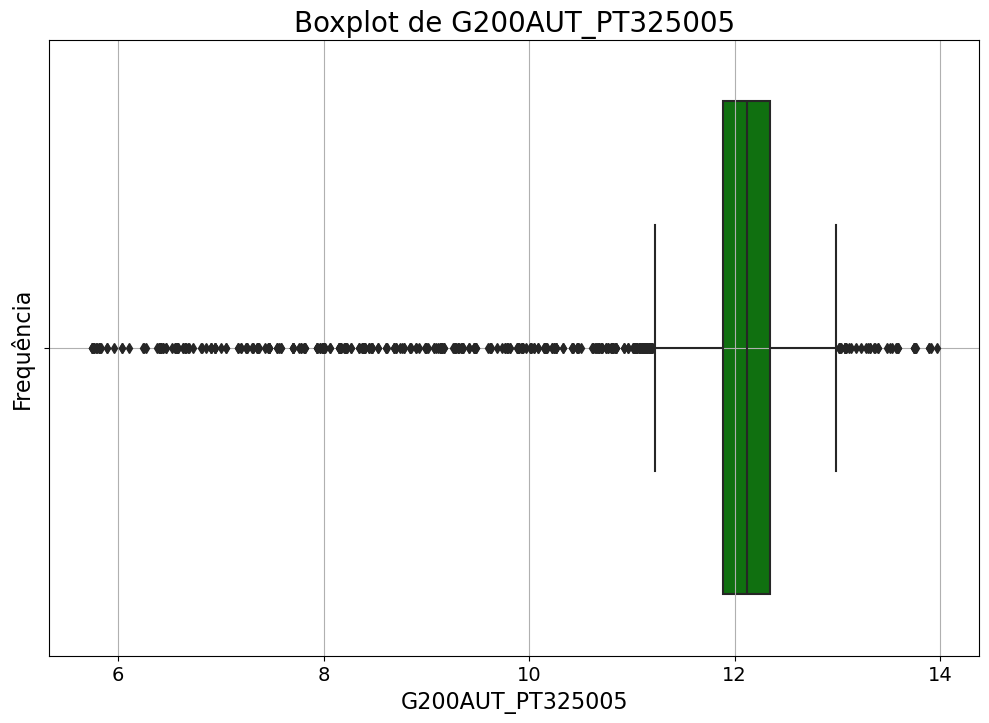

In [37]:
# com o recorte que eu fiz, ficamos com uma boa base de dados para trabalhar 
# vamos plotar os graficos desse novo data frame 
# Aumenta o tamanho da figura
plt.figure(figsize=(12, 8))

# Plota o boxplot
sns.boxplot(x=df1['G200AUT_PT325005'], color="green")

# Define o título do gráfico e os rótulos dos eixos com um tamanho de fonte maior
plt.title('Boxplot de G200AUT_PT325005', fontsize=20)
plt.xlabel('G200AUT_PT325005', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

# Aumenta o tamanho dos rótulos dos ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adiciona grades
plt.grid(True)

# Mostra o gráfico
plt.show()

In [38]:
# essa é a distribuição final que escolhi trabalhar, esses outliers são importantes para verificarmos as paradas de vapor


In [39]:
df.head()

,G200AUT_PT325005,dia,hora,ano,mes
31,20.65,1,08:42,2021,1
32,20.62,1,08:48,2021,1
33,20.59,1,08:53,2021,1
34,20.56,1,08:58,2021,1
35,20.53,1,09:03,2021,1


In [40]:
df_grouped_describe = df.groupby([ 'mes', 'ano']).describe()


In [41]:
# esse dataframe descreve o compartamento da minha variavel alvo nos meses e anos 
df_grouped_describe

G200AUT_PT325005                                                   \
                    count       mean       std    min    25%    50%    75%   
mes ano                                                                      
1   2021            236.0  19.365932  3.793328   0.56  20.31  20.53  20.62   
    2022           6349.0  20.042960  2.407119   0.47  20.21  20.38  20.51   
    2023           4790.0  20.076052  2.422879   0.39  20.25  20.43  20.56   
    2024          25134.0  15.215988  6.885753   0.00  12.05  19.75  20.19   
2   2021            853.0  20.531161  0.149521  19.32  20.49  20.57  20.63   
    2022           5891.0  20.015125  2.299188   0.48  20.14  20.33  20.49   
    2023           3667.0  20.438361  0.301156   6.66  20.36  20.48  20.58   
    2024          14828.0  20.255545  0.547749   1.42  20.08  20.36  20.53   
3   2021           1549.0  16.243144  7.986233   0.48  19.50  20.40  20.57   
    2022           5103.0  18.727776  5.274769   0.00  20.03  20.30  20.48   
    2023           3504.0  18.882745  5.116234   0.01  20.21  20.41  20.55   
    2024          12494.0  20.398506  0.406341   0.00  20.31  20.47  20.58   
4   2021           5566.0  19.899820  0.377939  11.87  19.66  19.87  20.16   
    2022           6855.0  19.785044  1.021928   1.07  19.51  19.82  20.21   
    2023           7188.0  19.867070  0.454361  17.34  19.57  19.90  20.21   
    2024          20914.0  20.282978  0.428680   0.00  20.14  20.34  20.51   
5   2021           8271.0  19.728825  0.384111  18.08  19.46  19.72  19.99   
    2022           8258.0  19.568295  0.640881   2.72  19.30  19.56  19.86   
    2023           7814.0  19.634788  0.534224  17.42  19.26  19.66  20.05   
    2024          27414.0  19.964282  0.411670  18.12  19.70  20.00  20.28   
6   2021           8034.0  19.570360  0.451845  17.71  19.25  19.54  19.88   
    2022           7727.0  19.461886  2.013852   0.48  19.38  19.67  19.96   
    2023           7633.0  19.609781  0.507529   9.07  19.26  19.58  19.96   
    2024          11296.0  20.034695  0.477735   0.00  19.79  20.09  20.34   
7   2021           8475.0  19.525044  0.879388   0.73  19.35  19.56  19.78   
    2022           8307.0  19.587225  0.423319  16.72  19.29  19.58  19.88   
    2023           7868.0  19.729310  0.430906  17.75  19.43  19.72  20.02   
8   2021           8436.0  19.641765  0.366492  10.01  19.44  19.64  19.87   
    2022           8400.0  19.637410  0.397547  17.19  19.36  19.62  19.92   
    2023           8073.0  19.678971  0.403051  18.03  19.41  19.66  19.94   
9   2021           8153.0  19.680308  0.332888  17.38  19.47  19.68  19.89   
    2022           7445.0  19.752733  0.433547  17.85  19.45  19.74  20.05   
    2023           8030.0  19.780240  0.367031  18.39  19.52  19.76  20.04   
10  2021           8367.0  19.706748  0.377885  17.90  19.41  19.67  19.96   
    2022           7865.0  19.798551  0.432718  11.79  19.52  19.80  20.09   
    2023           8457.0  19.609955  0.466513   0.00  19.37  19.61  19.85   
11  2021           6197.0  20.068985  2.047378   0.46  20.14  20.39  20.52   
    2022           8136.0  19.825793  0.359017  18.25  19.59  19.85  20.08   
    2023           7954.0  19.548992  1.367386   0.39  19.40  19.66  19.93   
12  2021           6595.0  20.349867  0.399415   9.74  20.24  20.41  20.54   
    2022           5848.0  20.193812  0.360950  13.23  19.97  20.27  20.48   
    2023           4684.0  18.395796  5.753572   0.47  19.97  20.30  20.47   

                     dia                                                    
            max    count       mean       std  min   25%   50%   75%   max  
mes ano                                                                     
1   2021  20.67    236.0  16.703390  7.281348  1.0  14.0  17.0  23.0  30.0  
    2022  20.67   6349.0  16.175146  8.682574  1.0   9.0  16.0  24.0  31.0  
    2023  20.67   4790.0  16.326305  8.922943  1.0   9.0  17.0  24.0  31.0  
    2024  20.67  25134.0  17.617649 

In [42]:
#dataframe acessorio para o plot de medias por ano
df_grouped_describe = df.groupby(['ano', 'mes', 'dia'])['G200AUT_PT325005'].mean().reset_index()

In [43]:
df_grouped_describe


,ano,mes,dia,G200AUT_PT325005
0,2021,1,1,20.487500
1,2021,1,4,20.563571
2,2021,1,8,20.630000
3,2021,1,12,20.535714
4,2021,1,13,20.625000
...,...,...,...,...
1216,2024,6,10,20.343853
1217,2024,6,11,20.207224
1218,2024,6,12,20.376652
1219,2024,6,13,20.136318


C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_5596\2536499317.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


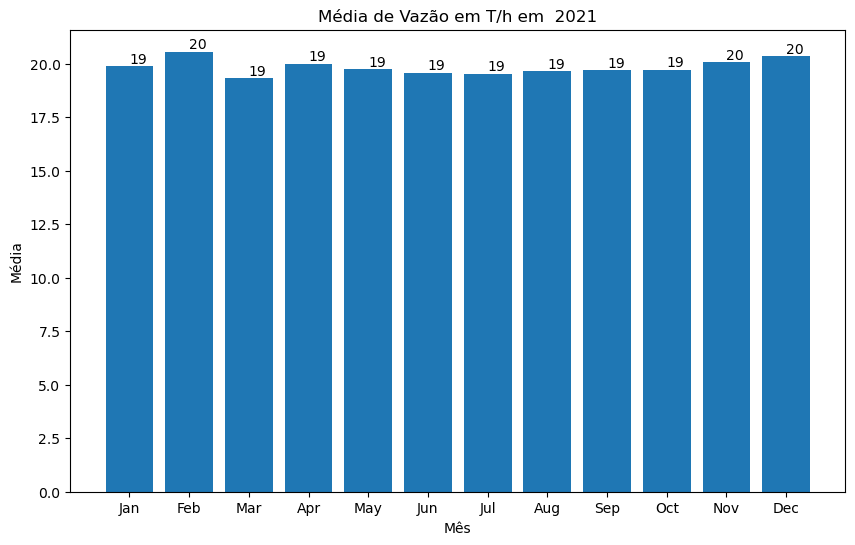

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_5596\2536499317.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


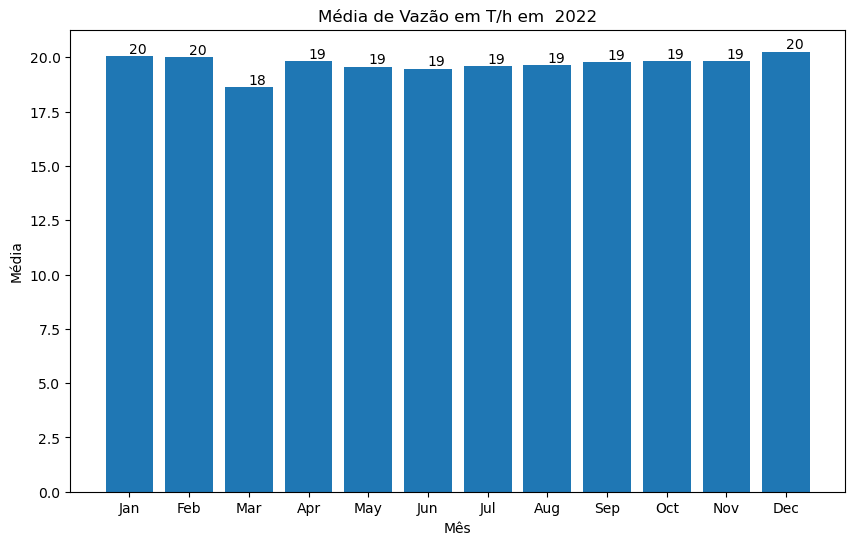

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_5596\2536499317.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


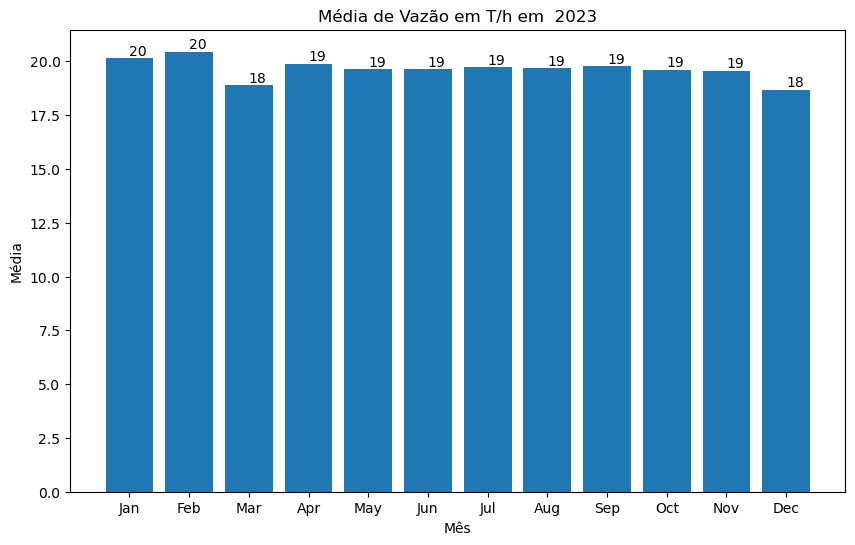

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_5596\2536499317.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


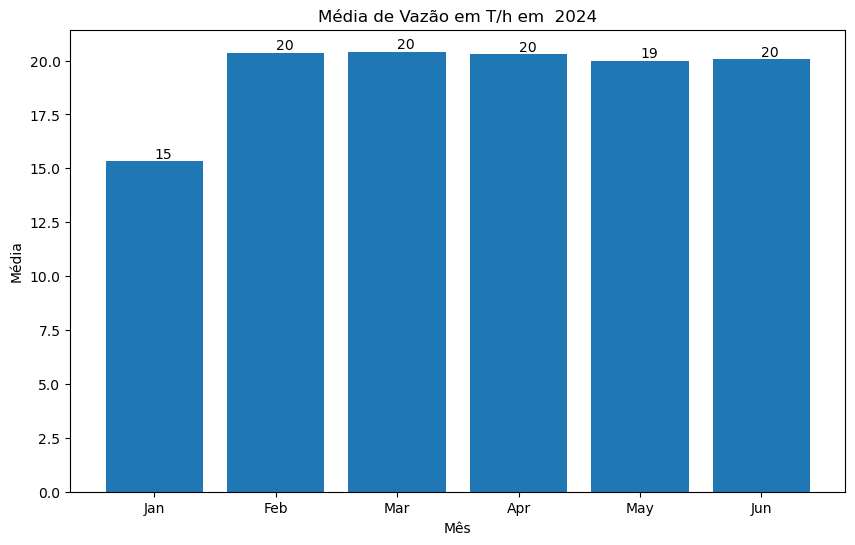

In [126]:
import calendar



# Obtendo os anos únicos
anos = df_grouped_describe['ano'].unique()

# Plotando um gráfico para cada ano
for ano in anos:
    df_ano = df_grouped_describe[df_grouped_describe['ano'] == ano]
    
    # Substituindo os números dos meses pelos nomes
    df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
    
    # Agrupando por mês e calculando a média
    df_ano = df_ano.groupby('mes')['G200AUT_PT325005'].mean().reset_index()
    
    # Ordenando os meses
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
    df_ano = df_ano.sort_values('mes')
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_ano['mes'], df_ano['G200AUT_PT325005'])
    plt.title(f'Média de Vazão em T/h em  {ano}')
    plt.xlabel('Mês')
    plt.ylabel('Média')

    # Adicionando rótulos de dados
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # posiciona o rótulo no topo da barra

    # Salva a figura como um arquivo PDF
    plt.savefig(f'graph_{ano}.pdf')

    plt.show()



C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\189826288.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


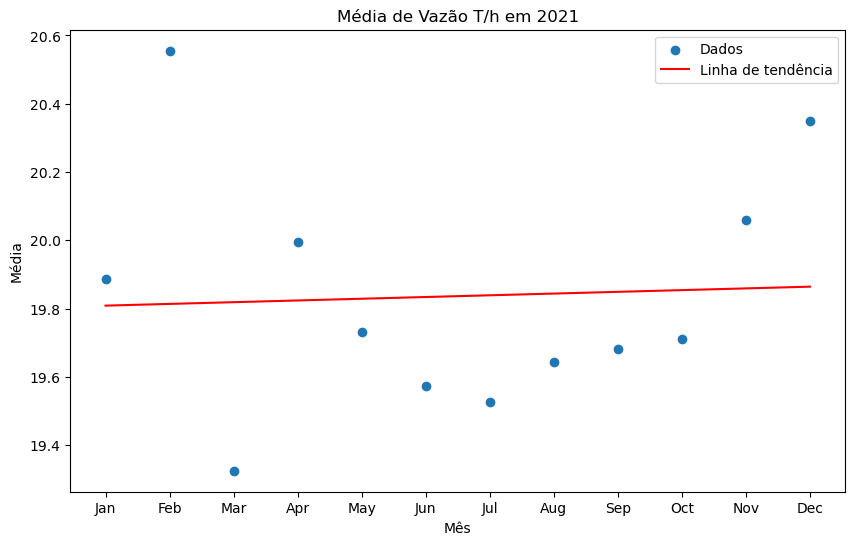

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\189826288.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


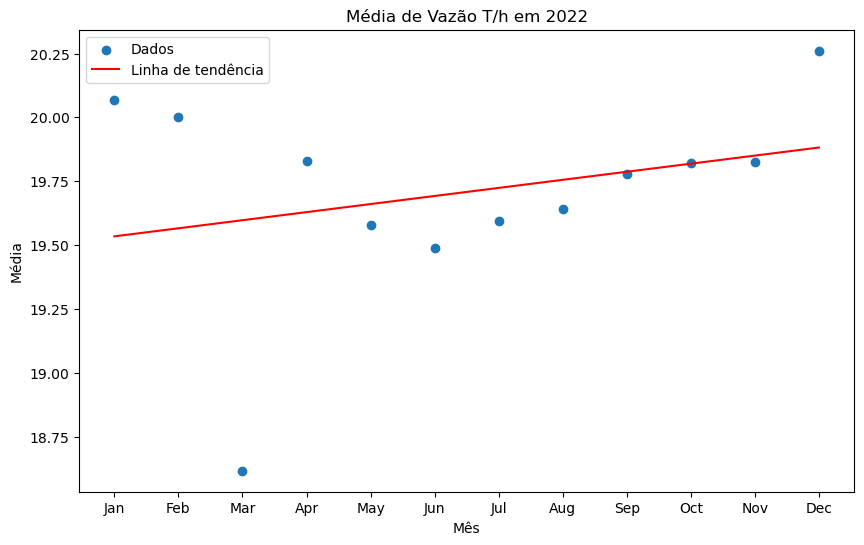

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\189826288.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


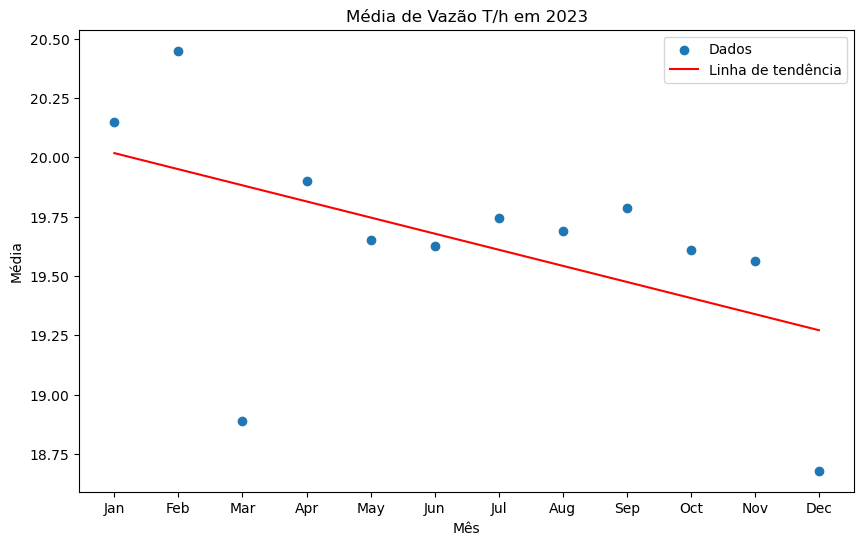

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\189826288.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


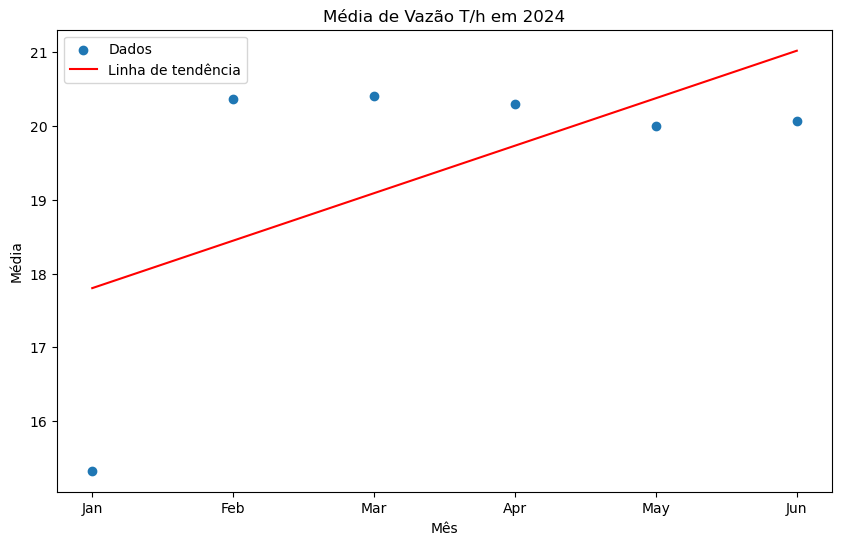

In [44]:

import calendar

from scipy import stats




# Obtendo os anos únicos
anos = df_grouped_describe['ano'].unique()

# Plotando um gráfico para cada ano
for ano in anos:
    df_ano = df_grouped_describe[df_grouped_describe['ano'] == ano]
    
    # Substituindo os números dos meses pelos nomes
    df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
    
    # Agrupando por mês e calculando a média
    df_ano = df_ano.groupby('mes')['G200AUT_PT325005'].mean().reset_index()
    
    # Ordenando os meses
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
    df_ano = df_ano.sort_values('mes')
    
    plt.figure(figsize=(10, 6))
    
    # Plotando os pontos
    plt.scatter(df_ano['mes'], df_ano['G200AUT_PT325005'], label='Dados')
    
    # Adicionando linha de tendência
    x = np.arange(len(df_ano['mes']))
    y = df_ano['G200AUT_PT325005']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(df_ano['mes'], intercept + slope*x, 'r', label='Linha de tendência')
    
    plt.title(f'Média de Vazão T/h em {ano}')
    plt.xlabel('Mês')
    plt.ylabel('Média')
    plt.legend()

    # Salva a figura como um arquivo PDF
    plt.savefig(f'dispersao_{ano}.pdf')

    plt.show()



In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 348658 entries, 31 to 484761
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   G200AUT_PT325005  348658 non-null  float64
 1   dia               348658 non-null  int32  
 2   hora              348658 non-null  object 
 3   ano               348658 non-null  int32  
 4   mes               348658 non-null  int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 12.0+ MB


C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)


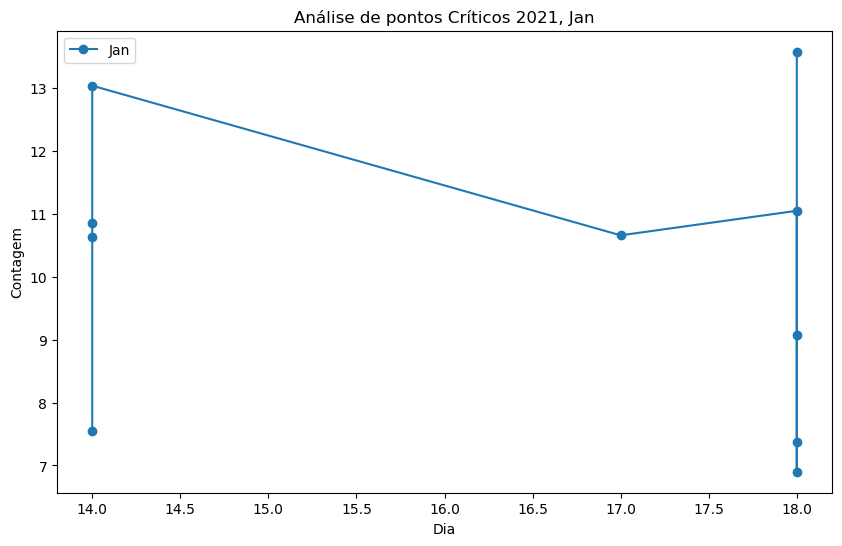

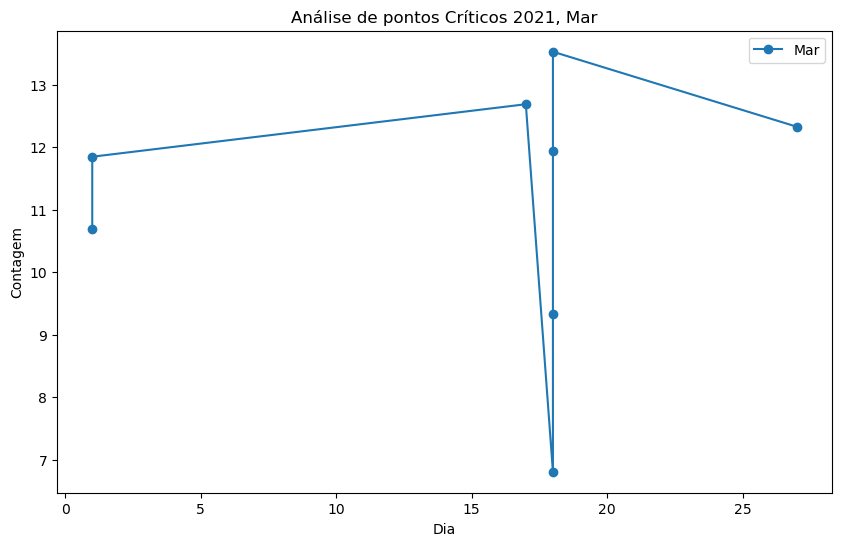

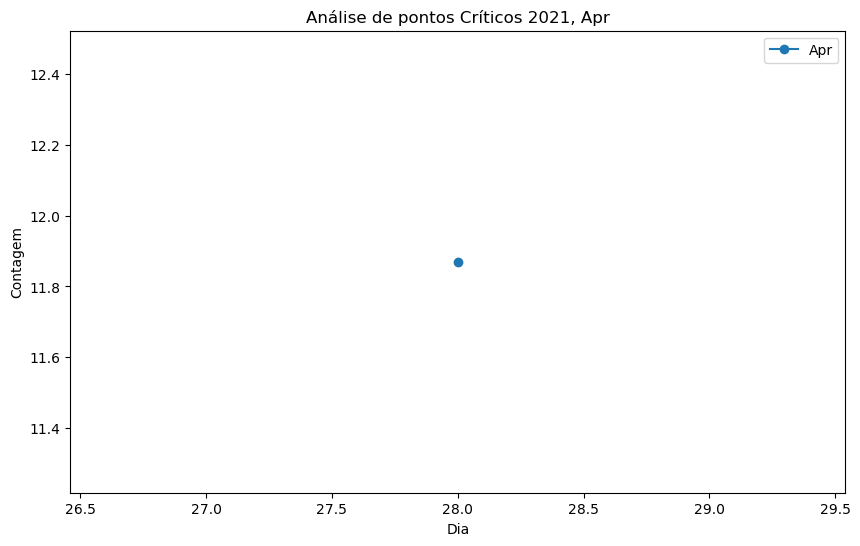

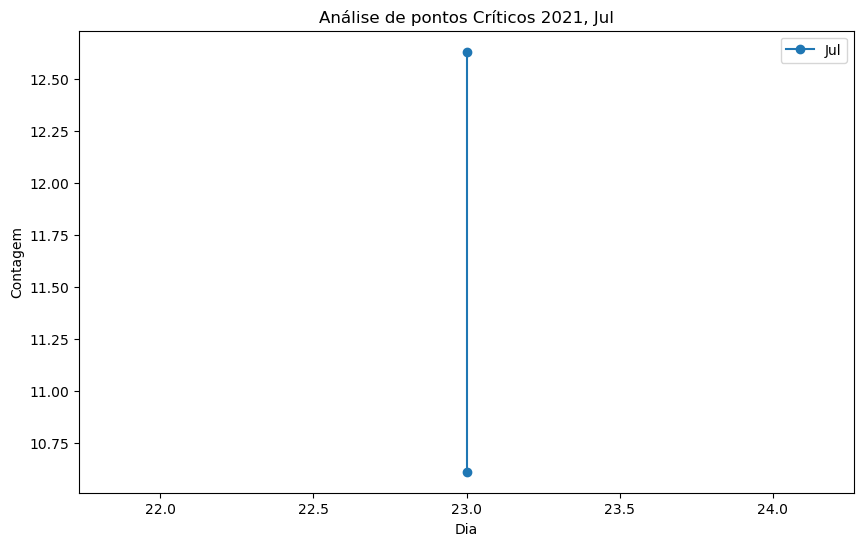

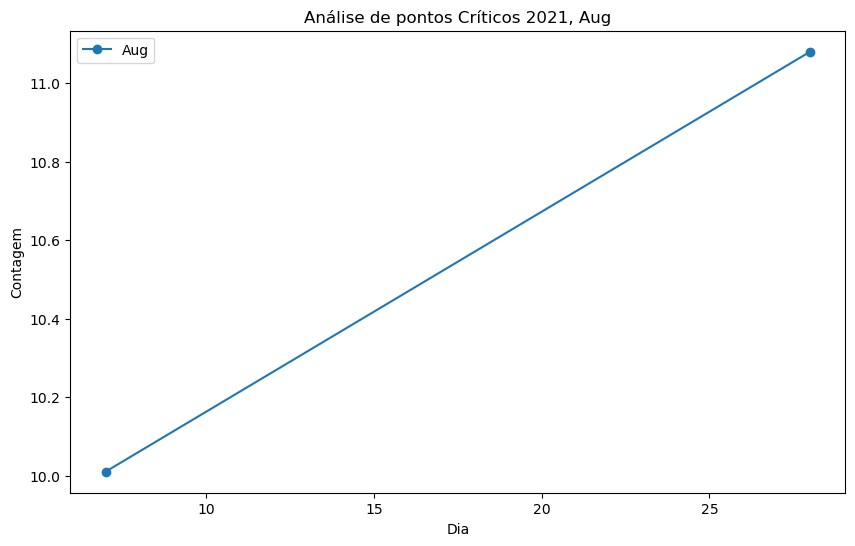

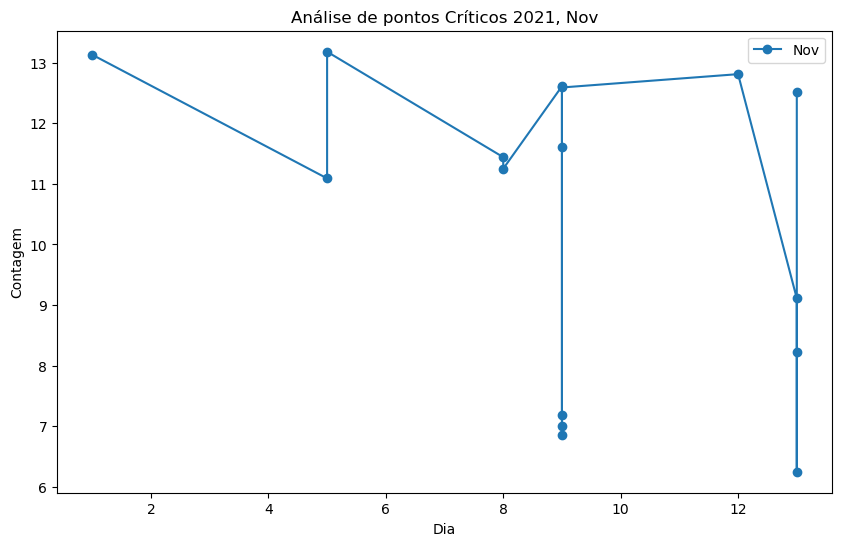

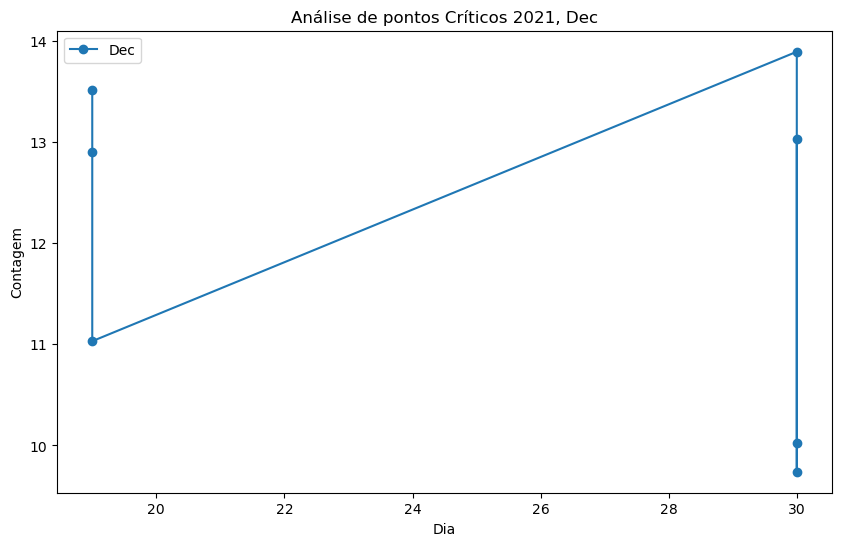

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)


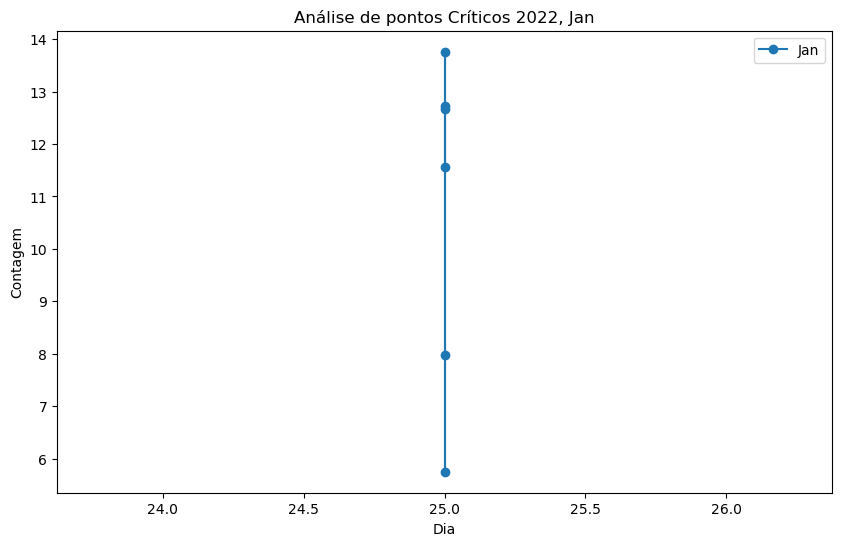

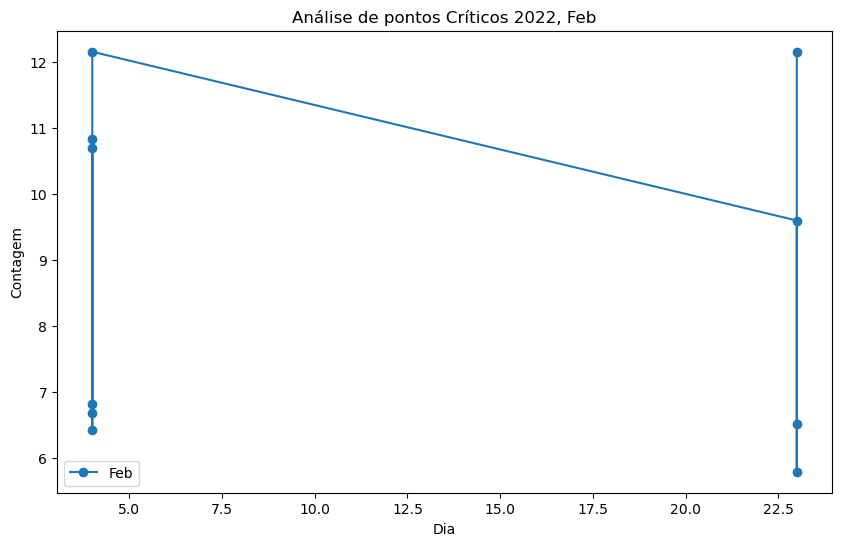

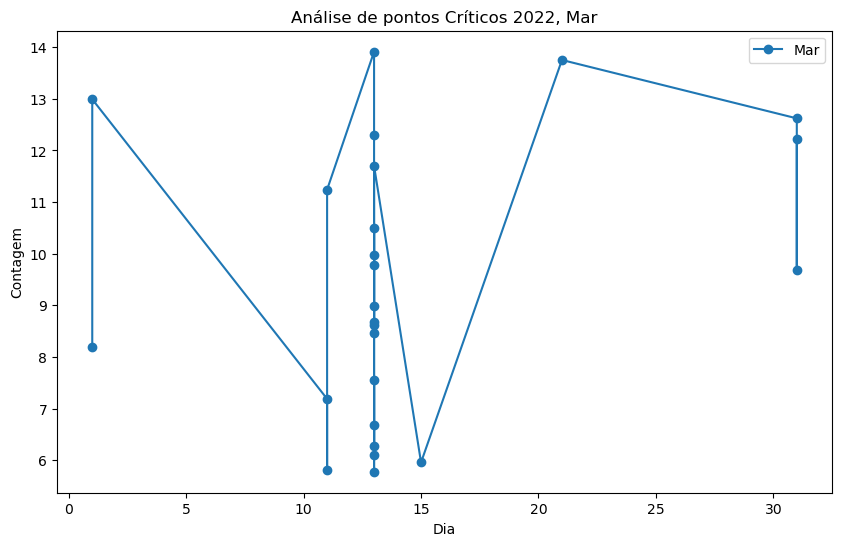

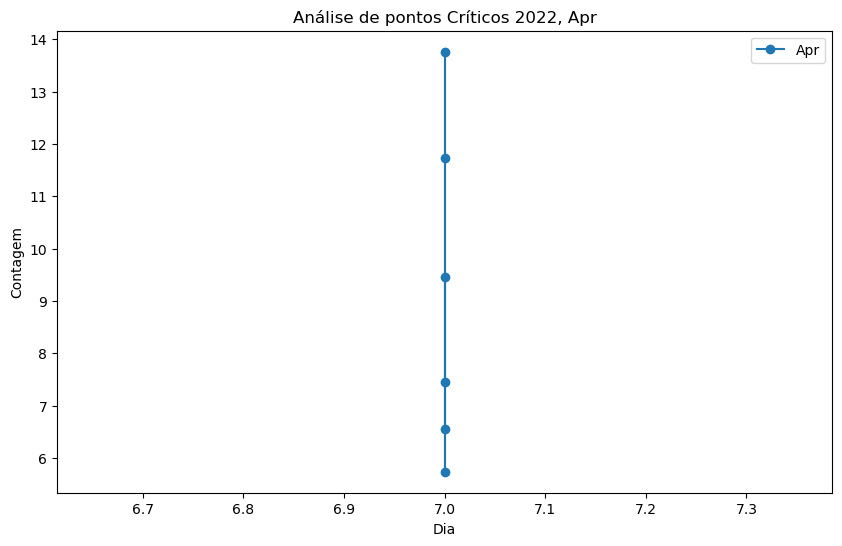

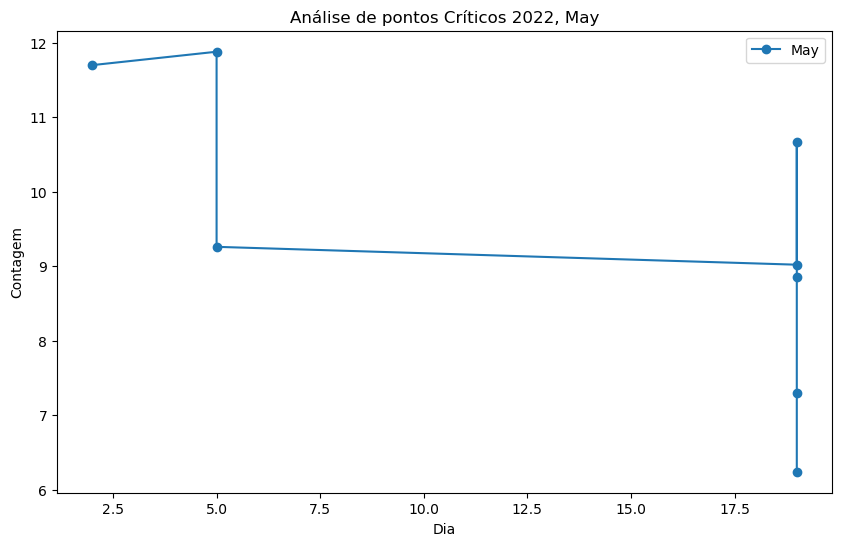

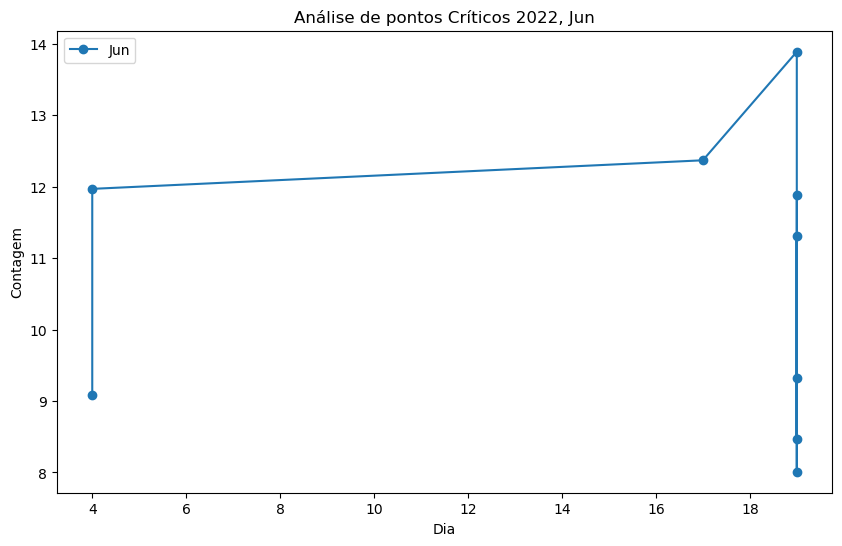

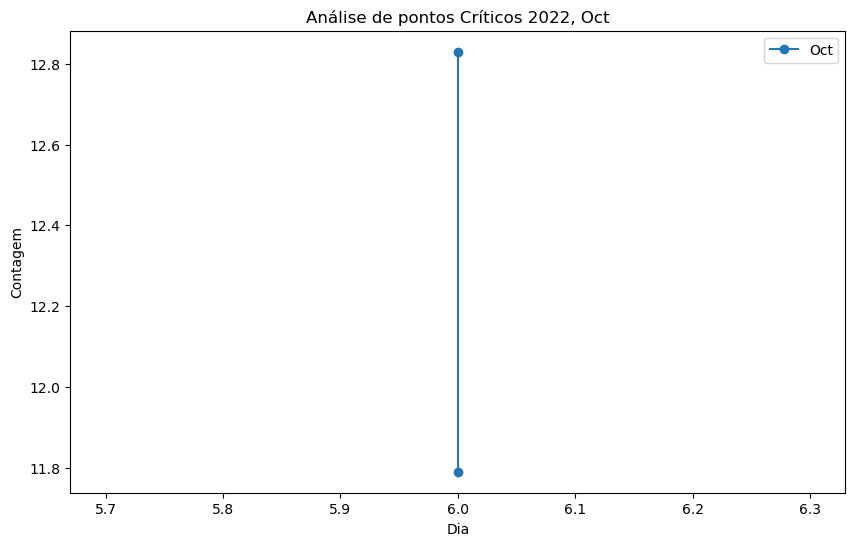

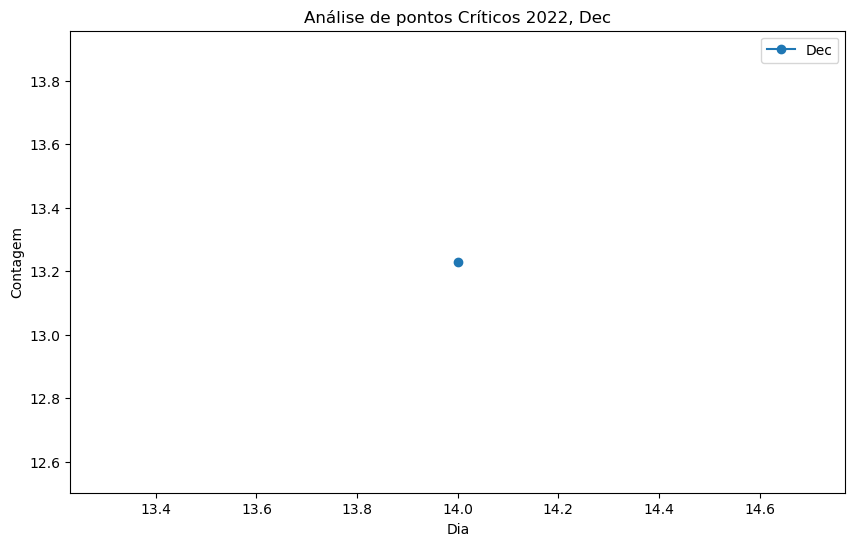

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)


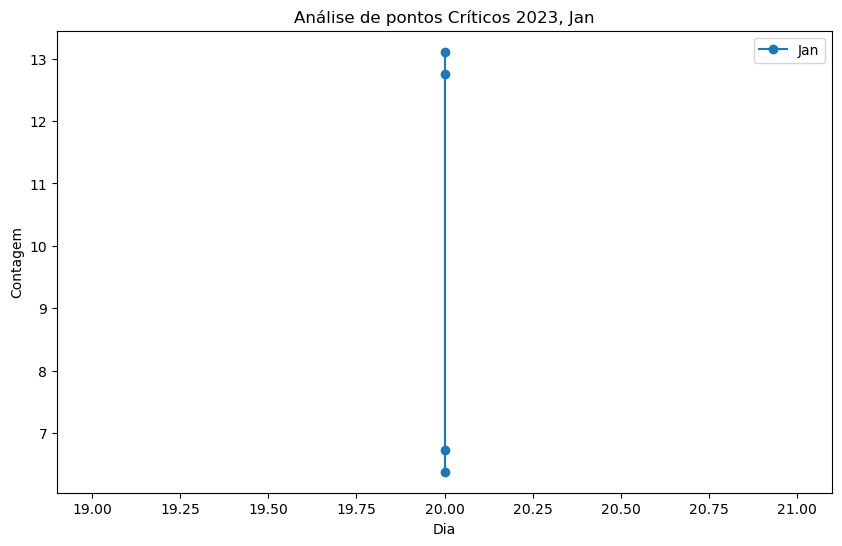

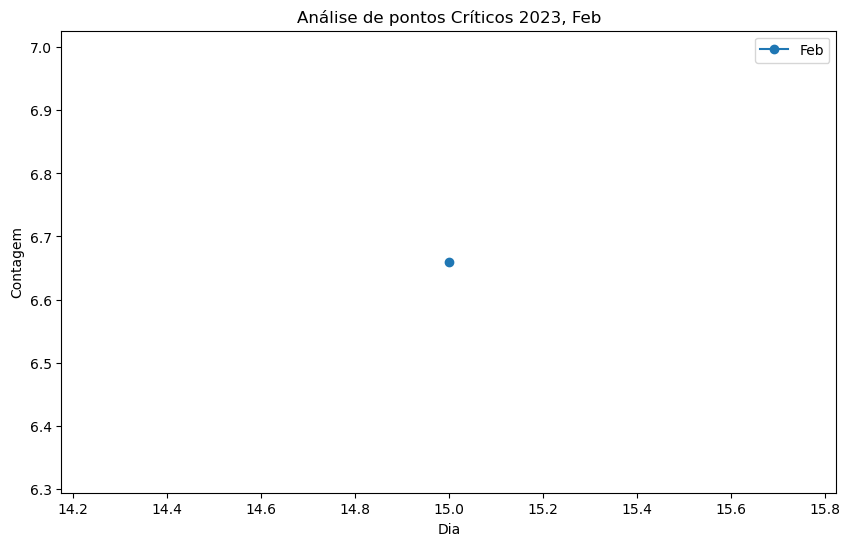

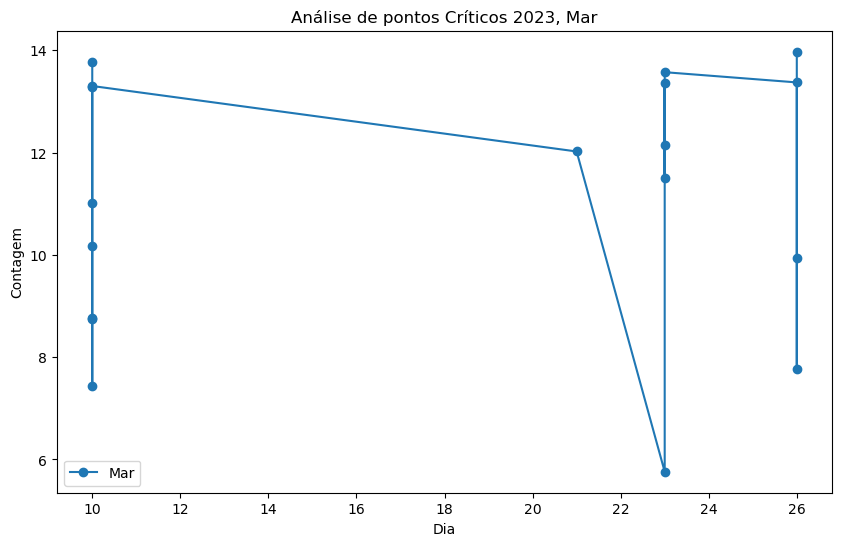

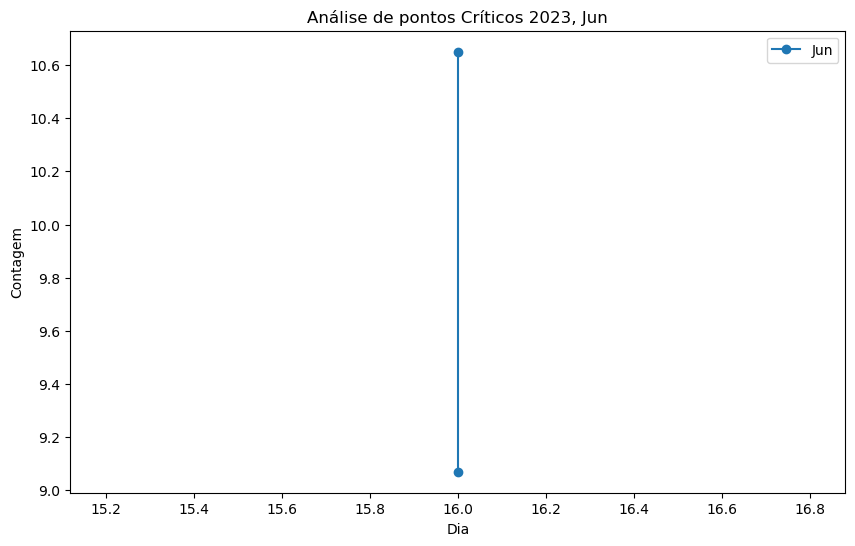

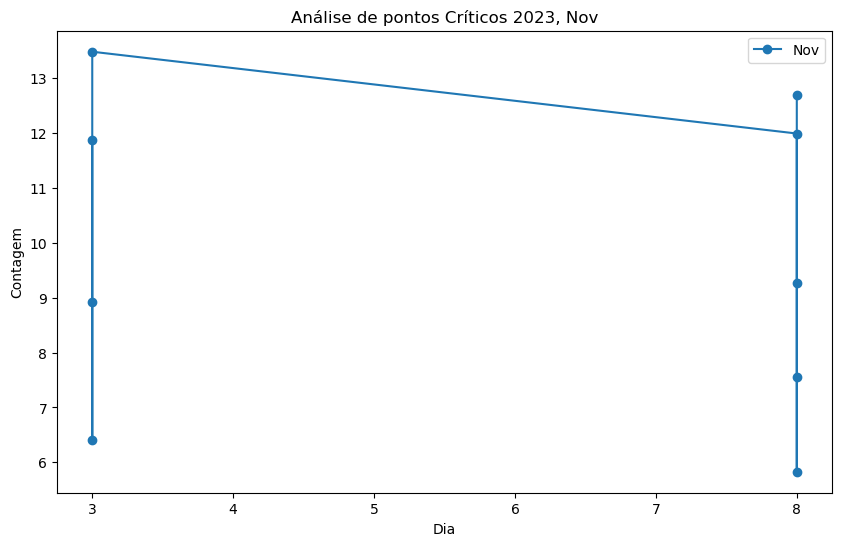

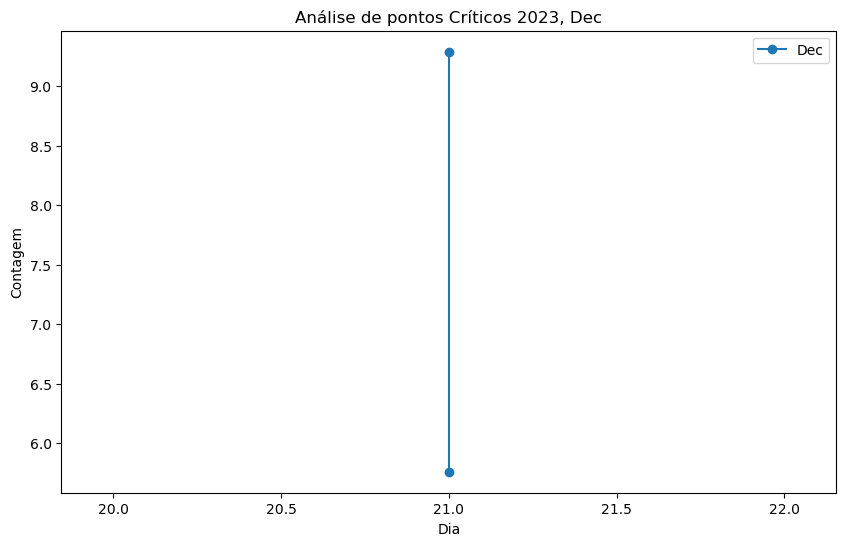

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2408999670.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)


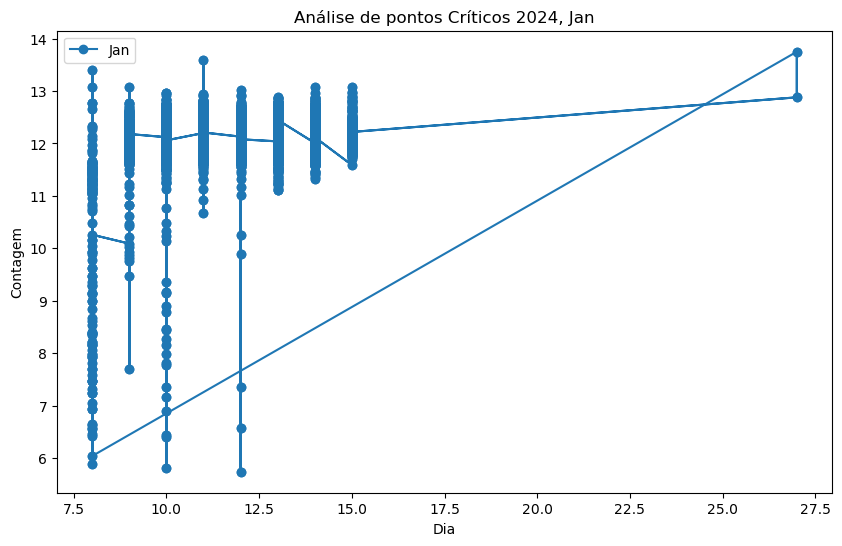

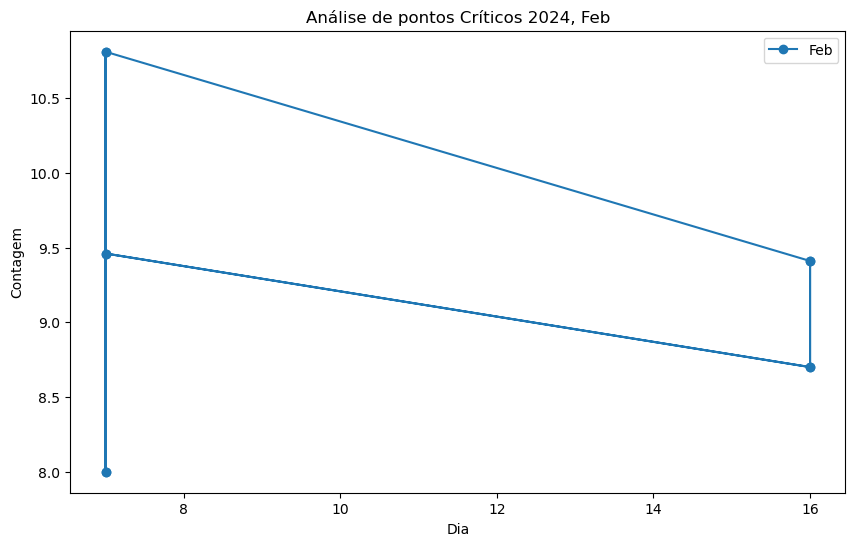

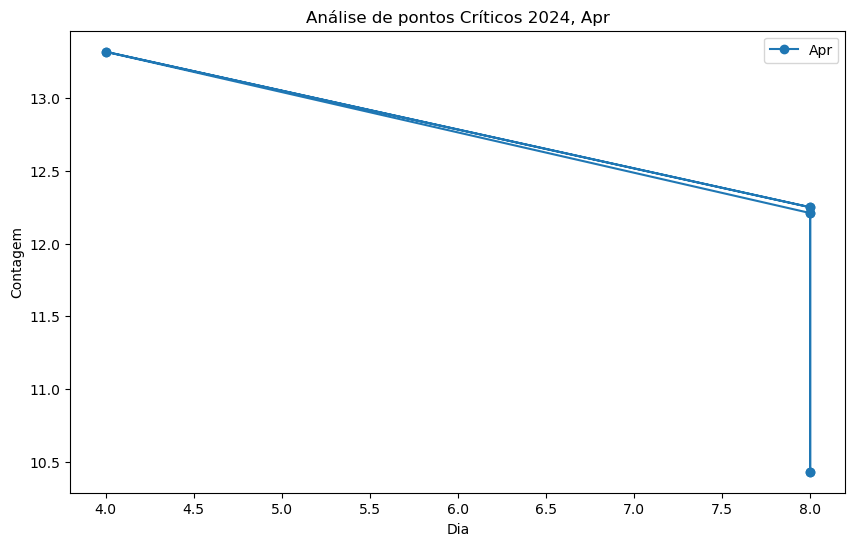

In [45]:

import calendar


# Obtendo os anos únicos
anos = df1['ano'].unique()

# Plotando um gráfico para cada ano
for ano in anos:
    df_ano = df1[df1['ano'] == ano]
    
    # Substituindo os números dos meses pelos nomes
    df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
    
    # Ordenando os meses
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
    
    # Plotando um gráfico para cada mês
    for mes in df_ano['mes'].unique():
        df_mes = df_ano[(df_ano['mes'] == mes) & (df_ano['G200AUT_PT325005'] < 16)]
        plt.figure(figsize=(10, 6))
        
        # Plotando a linha
        plt.plot(df_mes['dia'], df_mes['G200AUT_PT325005'], marker='o', label=mes)
        
        plt.title(f'Análise de pontos Críticos {ano}, {mes}')
        plt.xlabel('Dia')
        plt.ylabel('Contagem')
        plt.legend()

        # Salva a figura como um arquivo PDF
        plt.savefig(f'menores14_{ano}_{mes}.pdf')

        plt.show()




C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:25: FutureWarning: The default of observed=False is depr

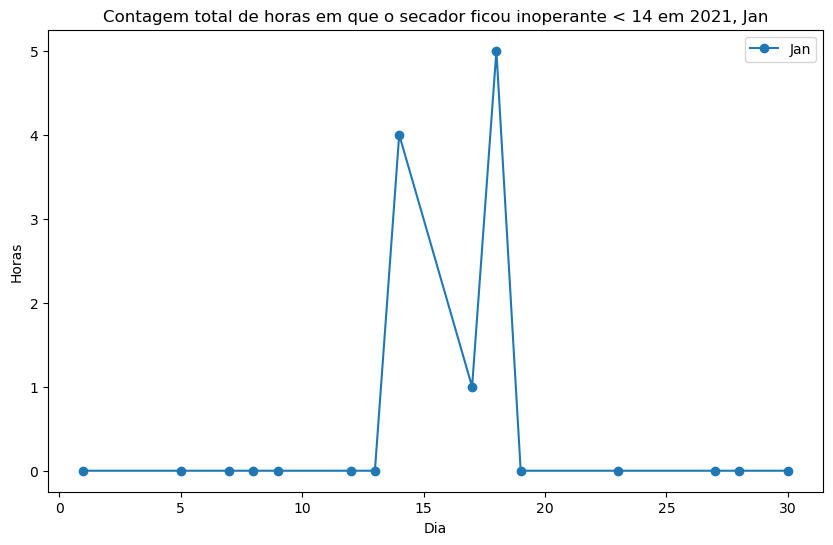

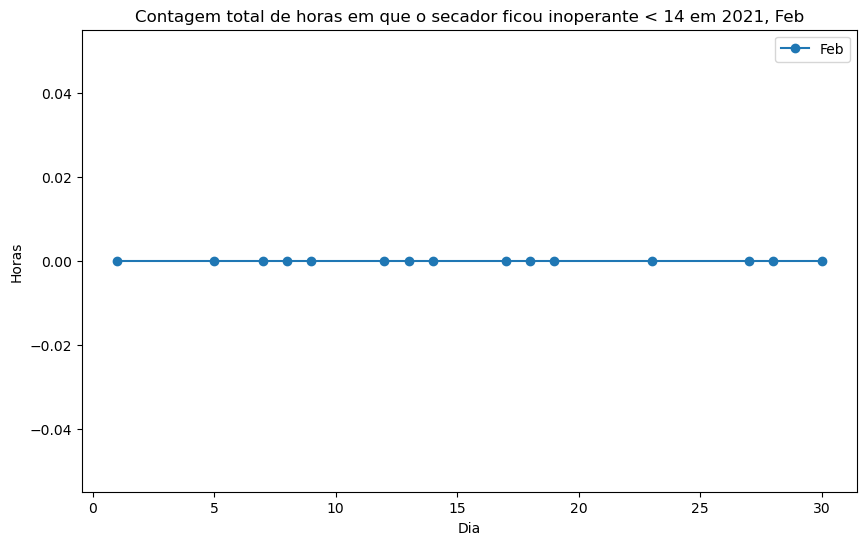

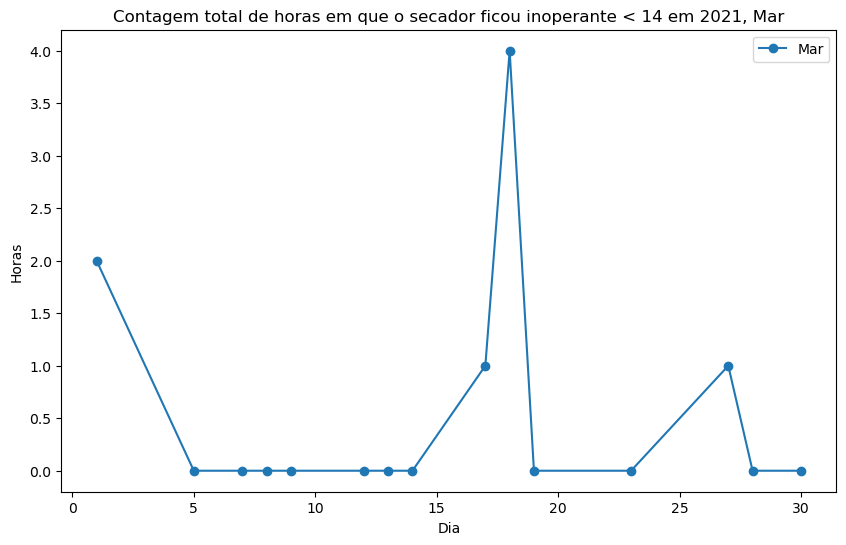

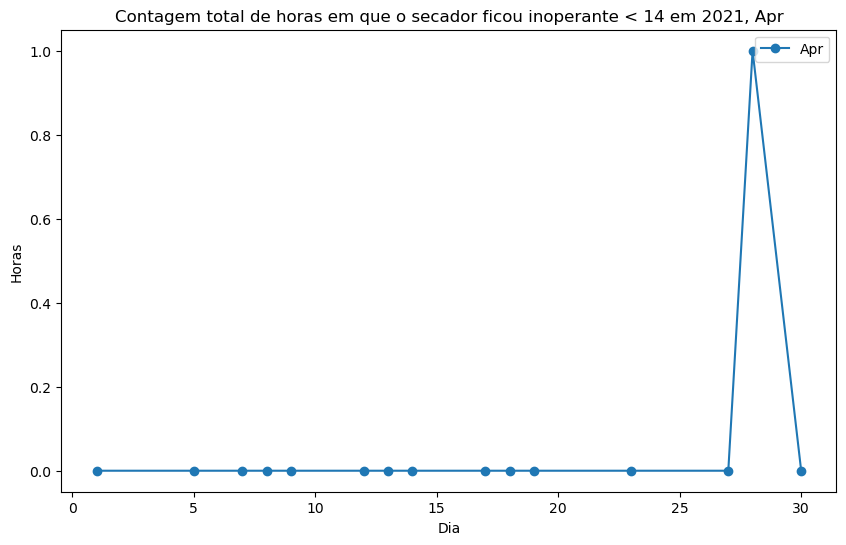

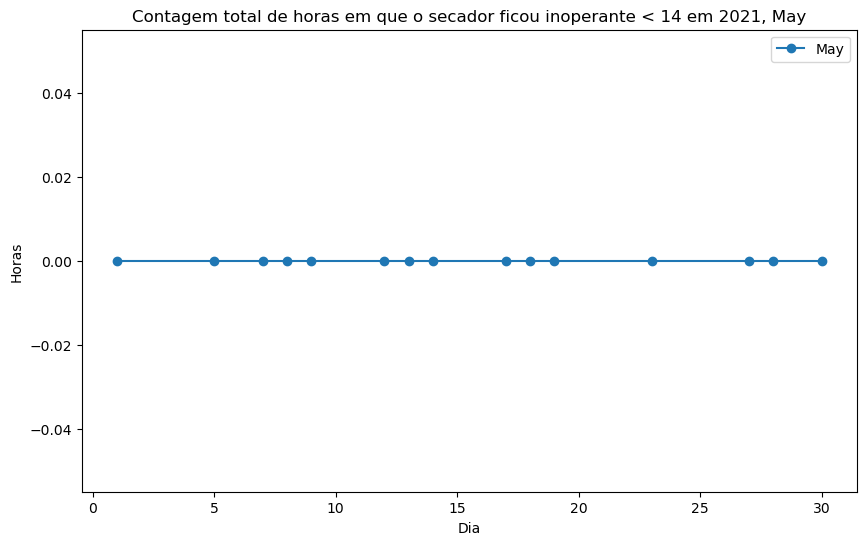

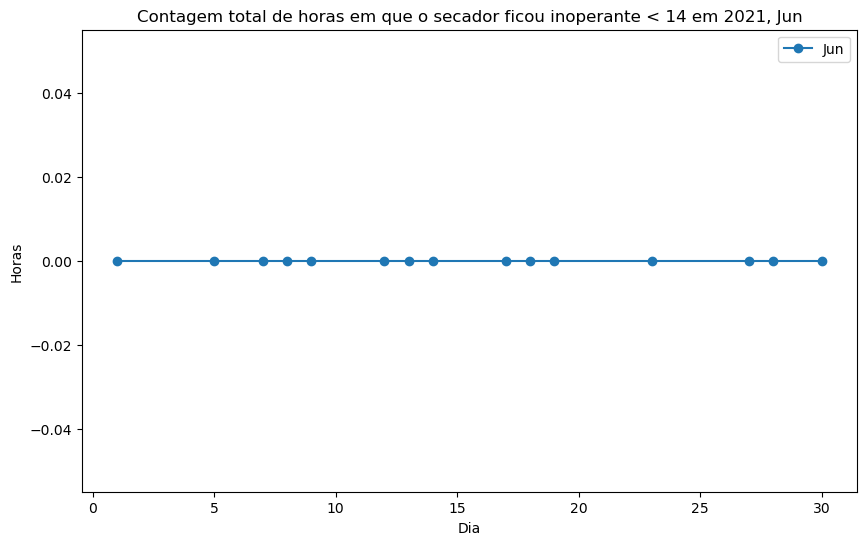

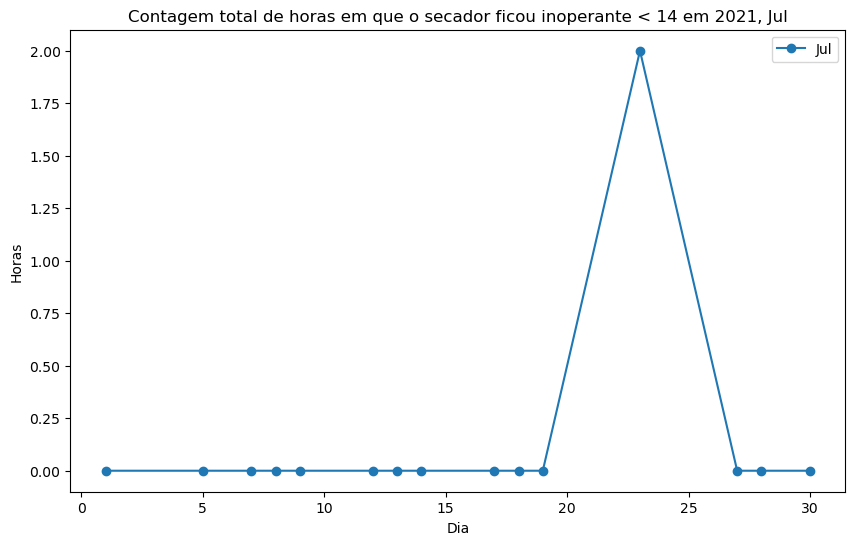

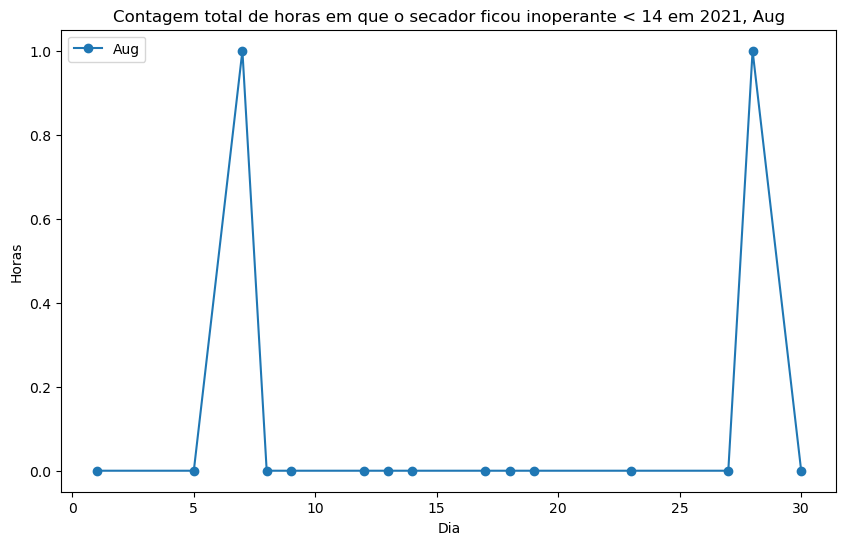

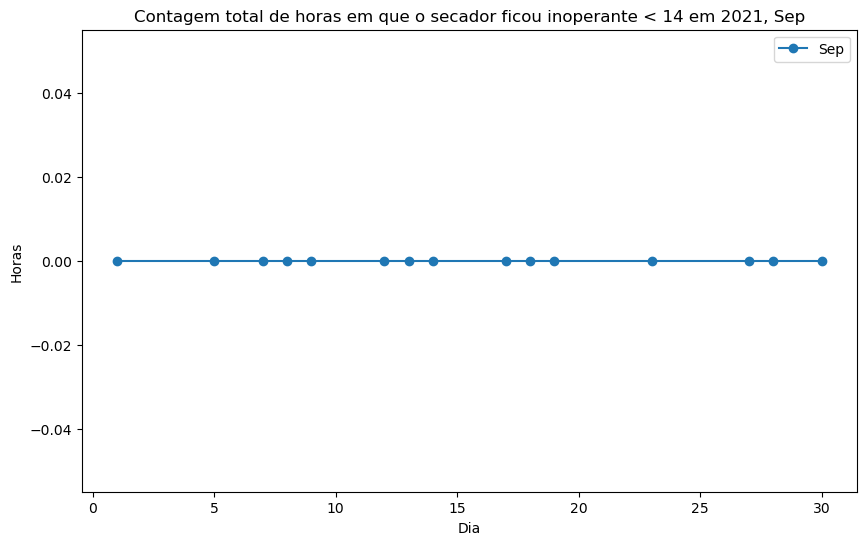

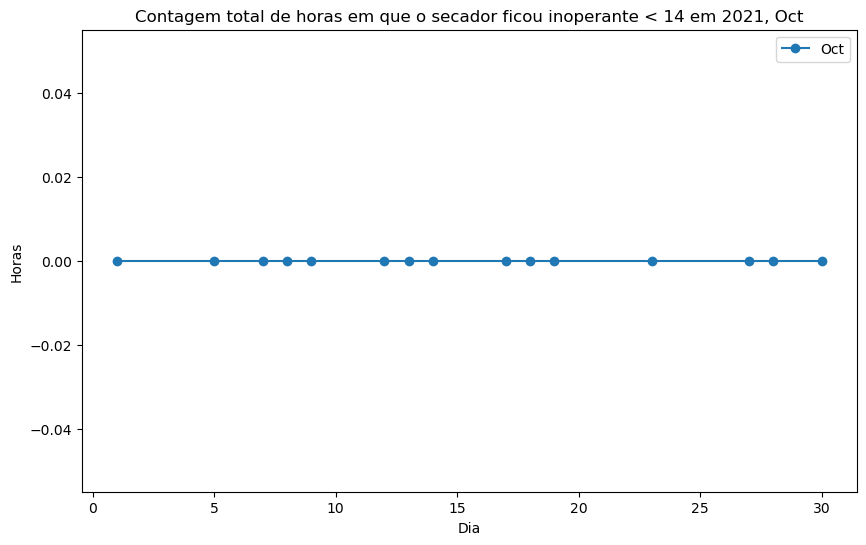

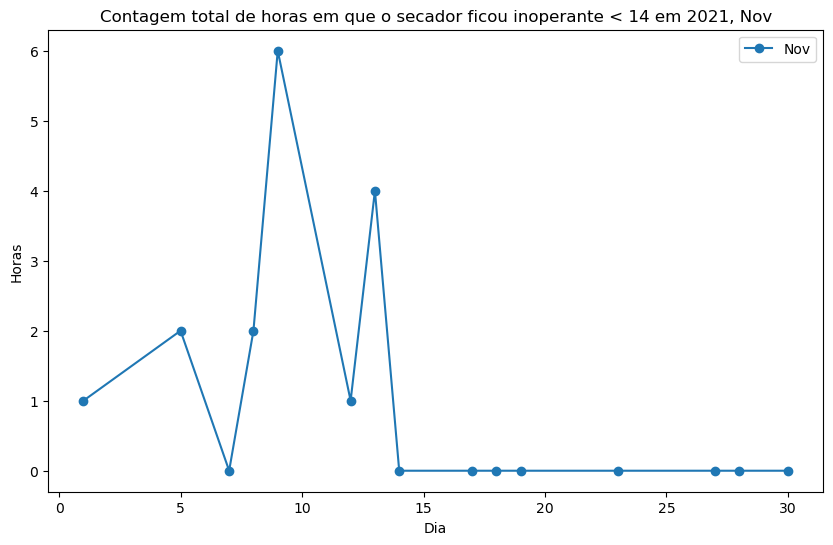

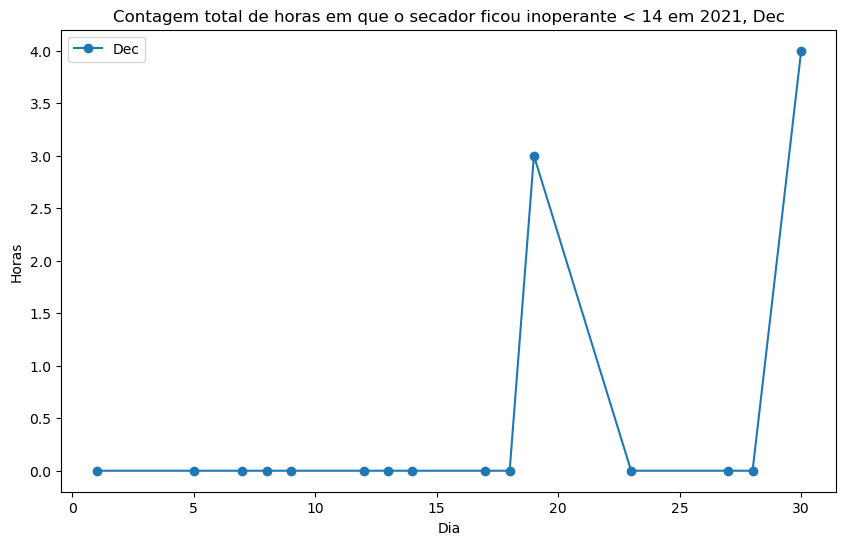

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:25: FutureWarning: The default of observed=False is depr

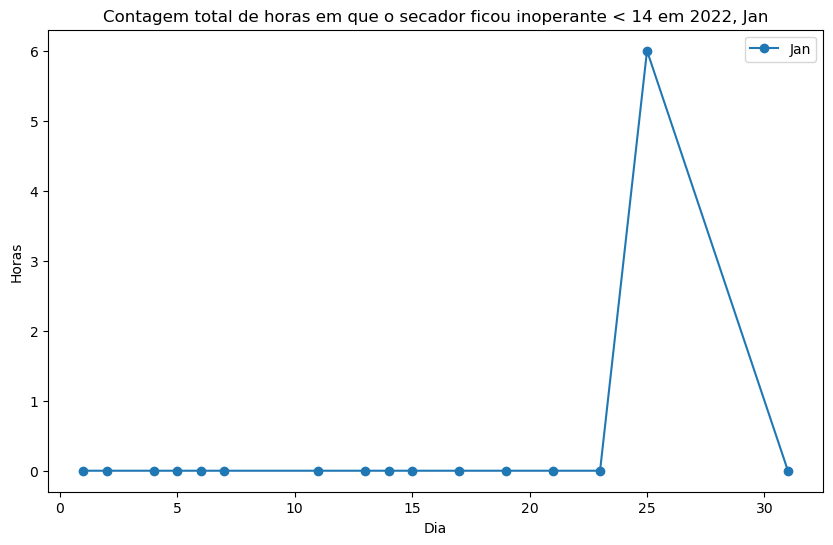

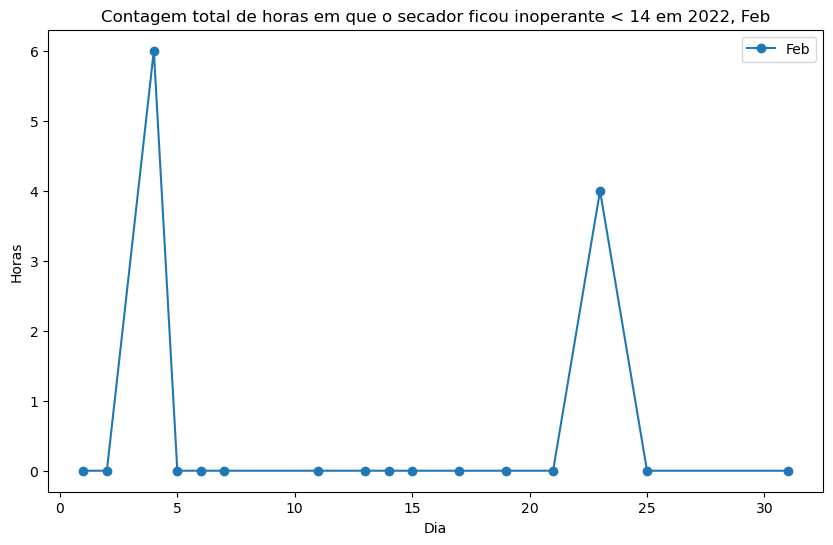

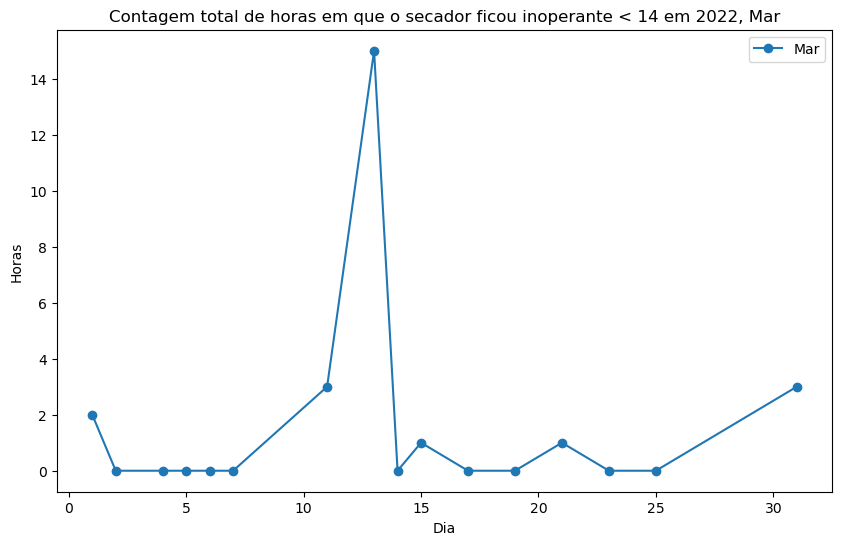

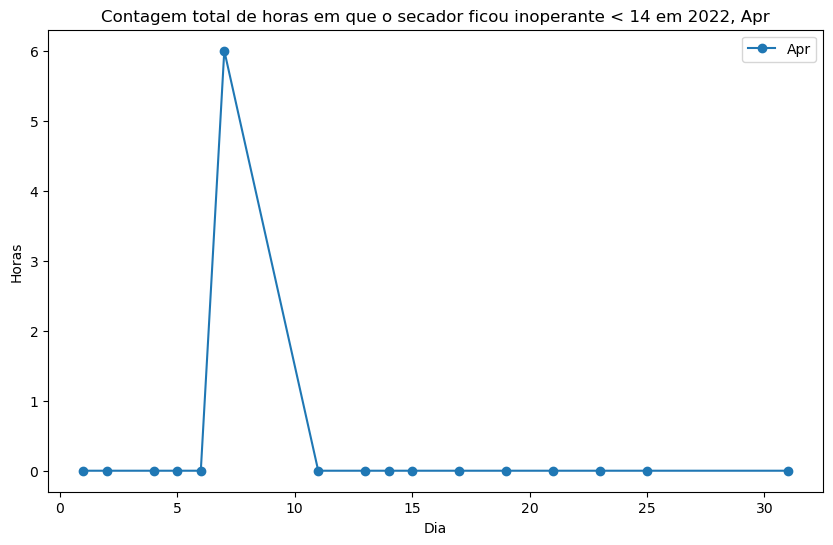

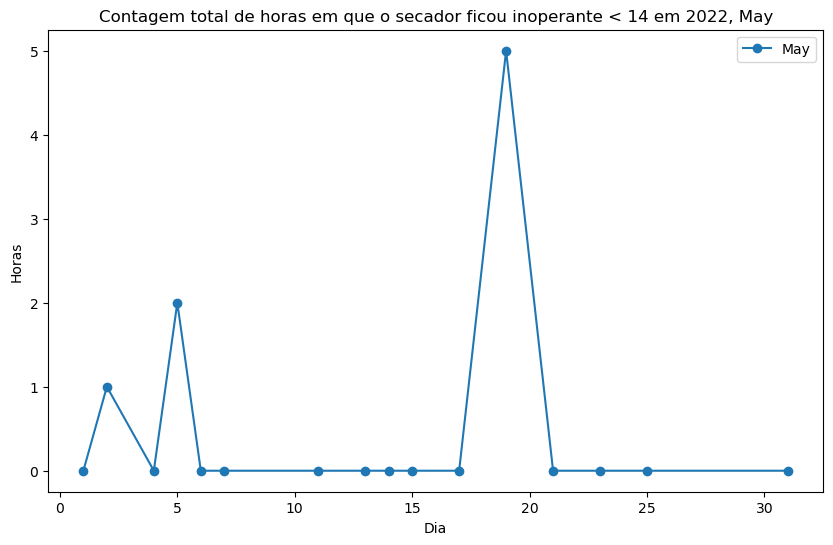

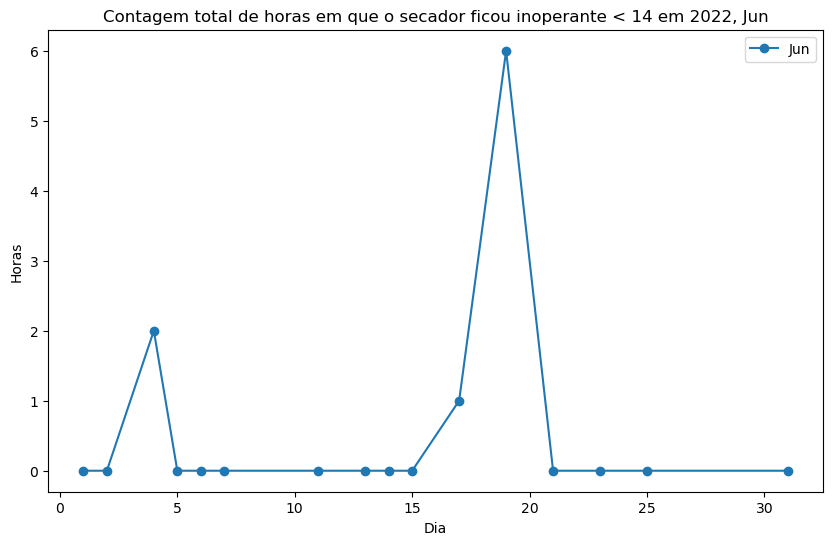

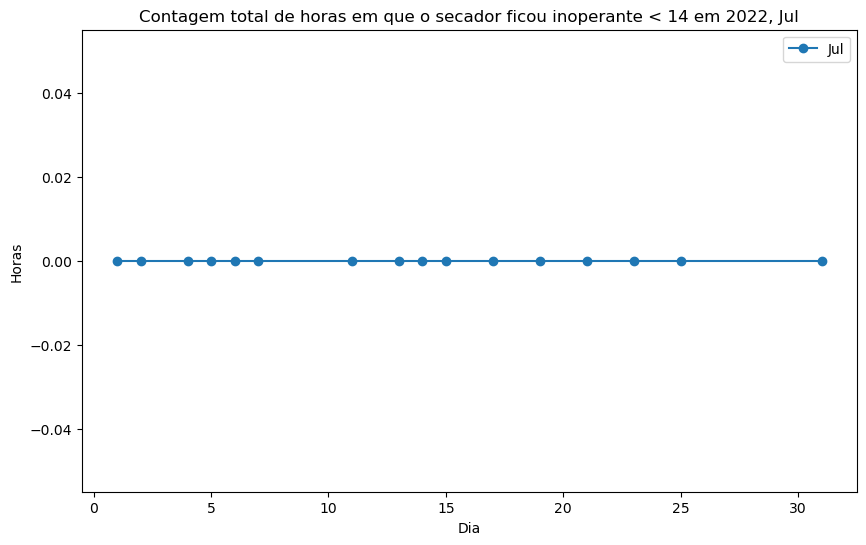

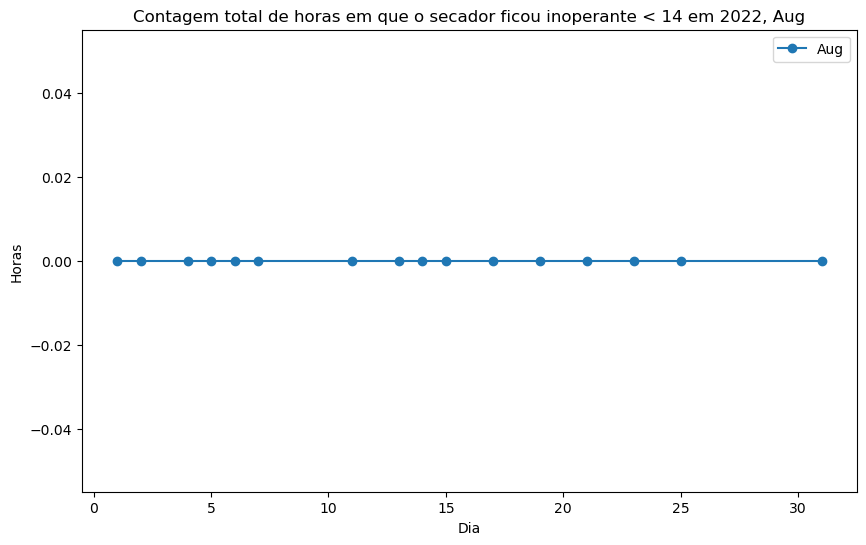

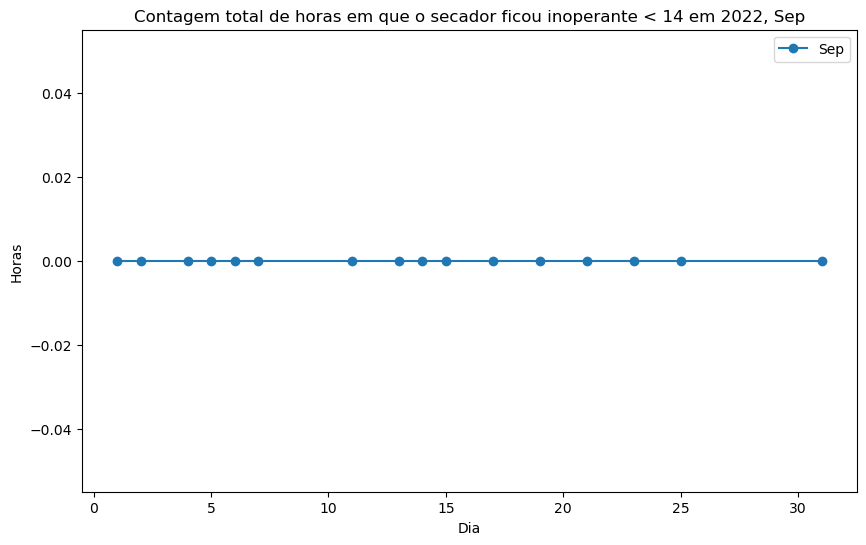

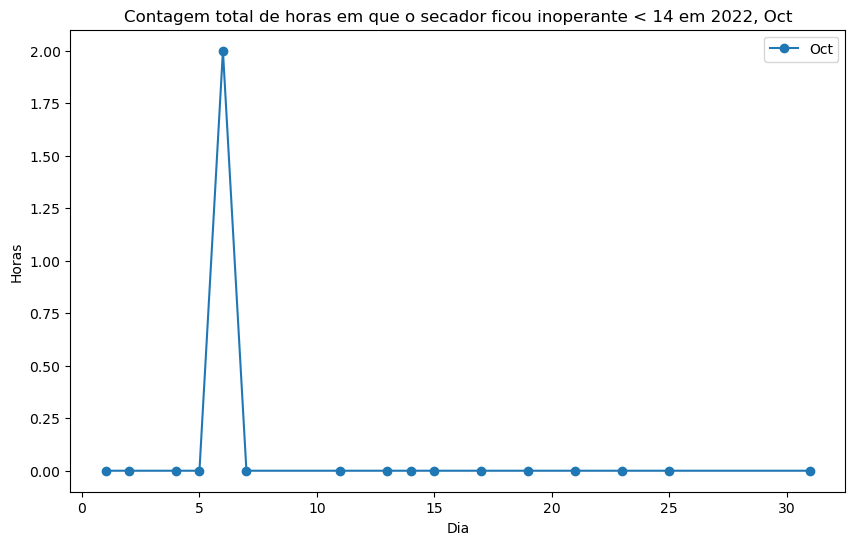

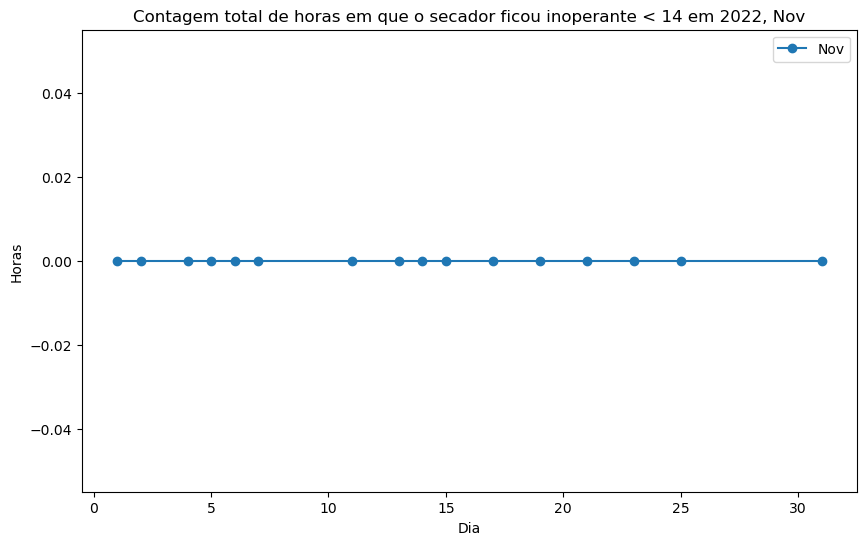

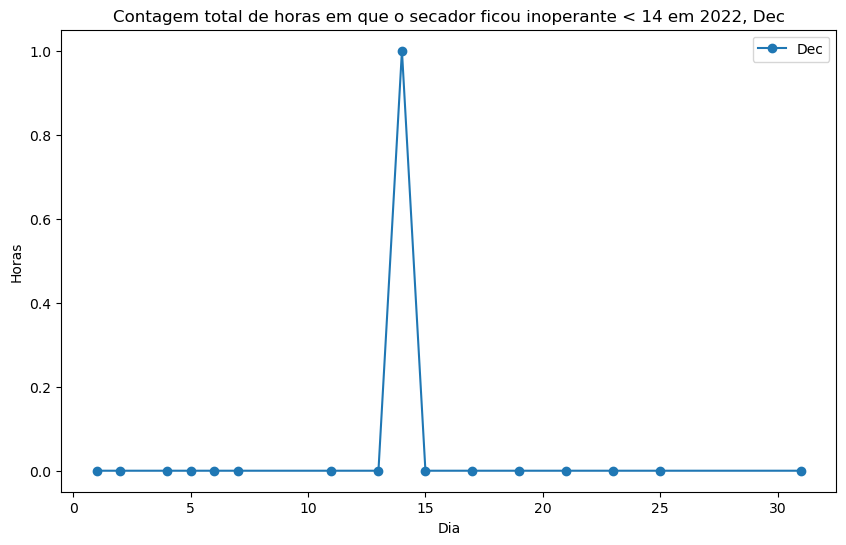

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:25: FutureWarning: The default of observed=False is depr

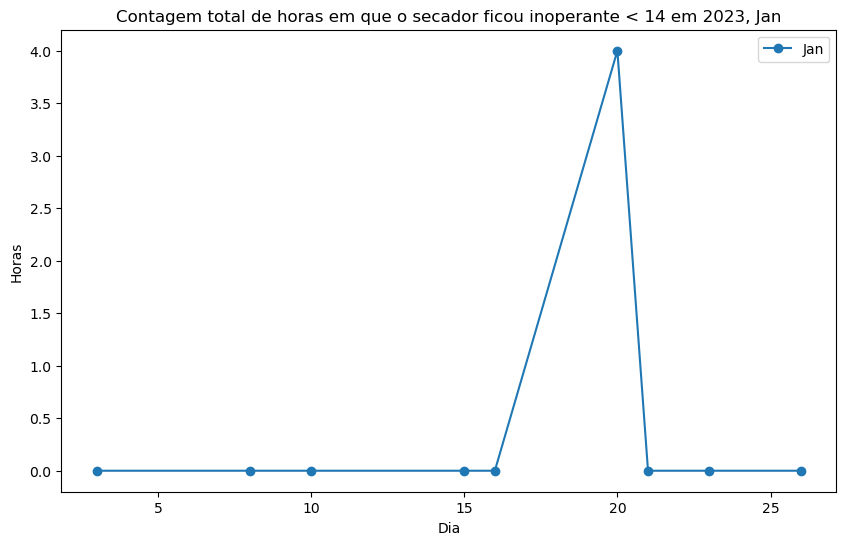

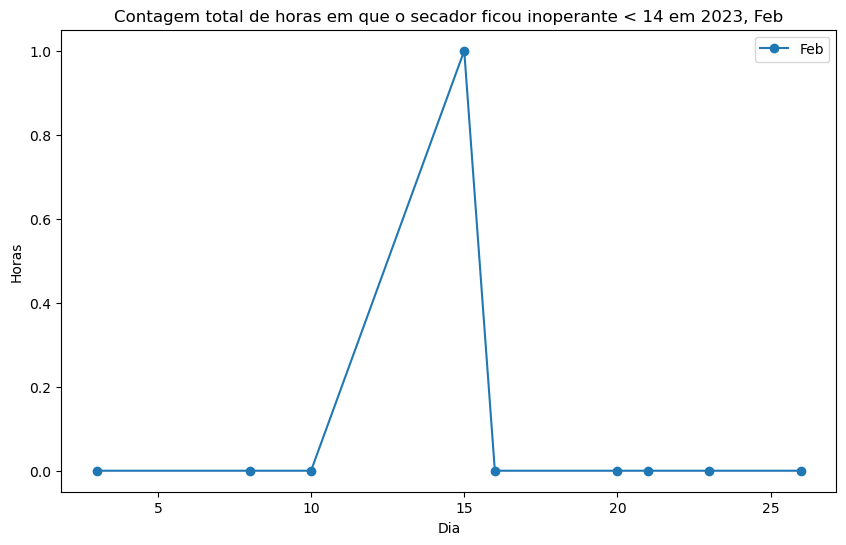

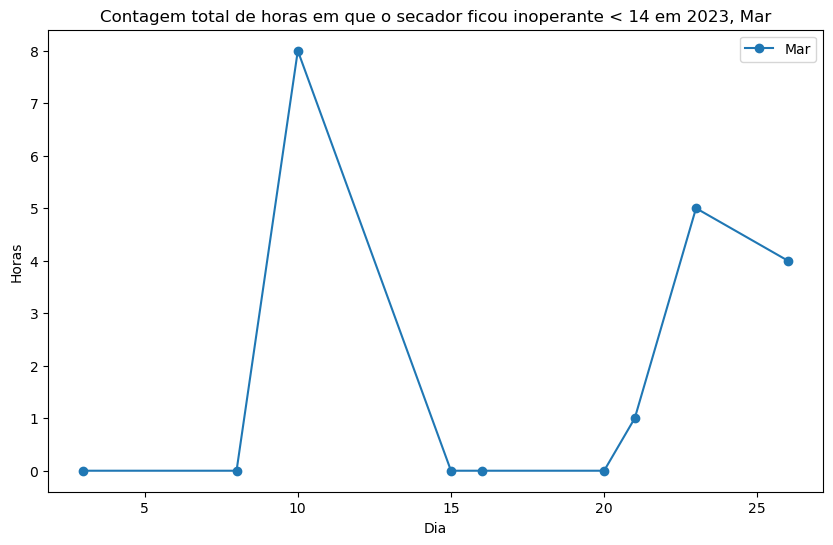

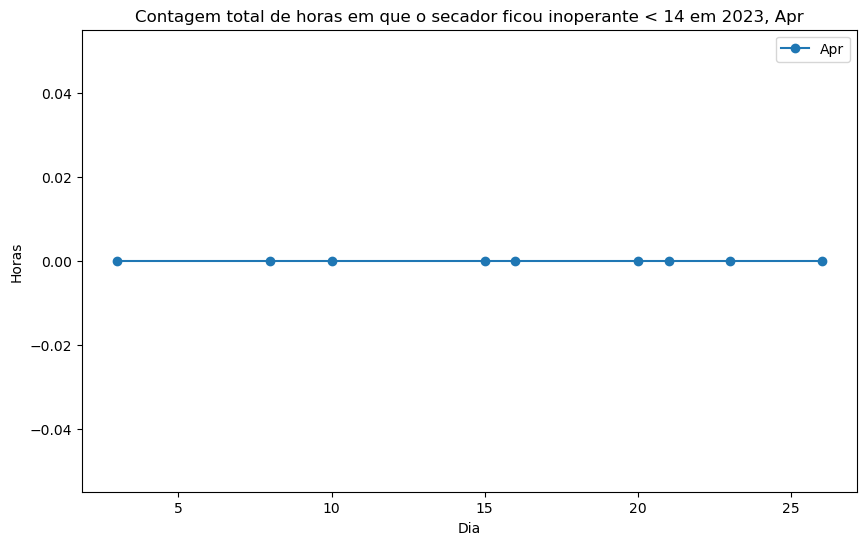

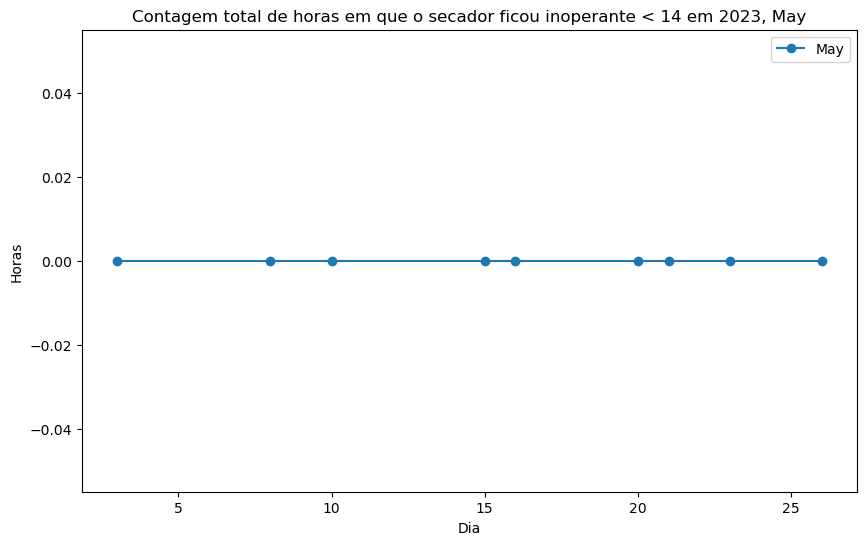

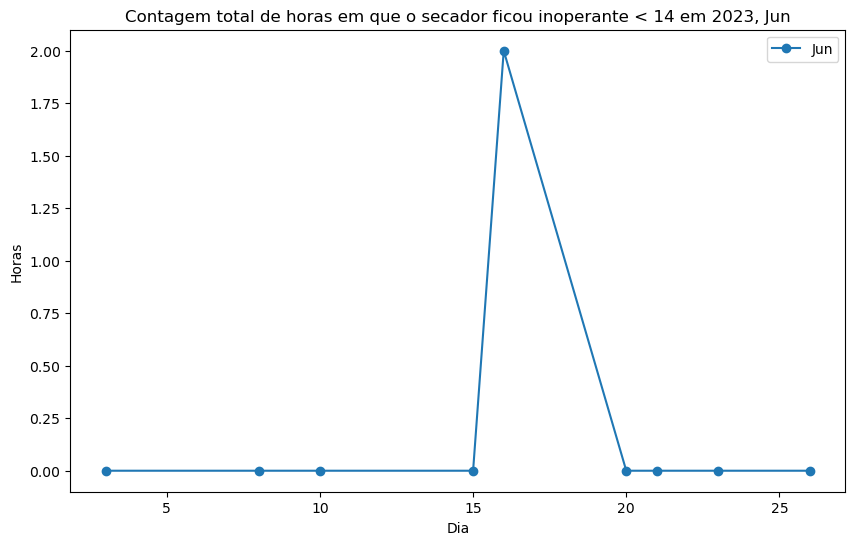

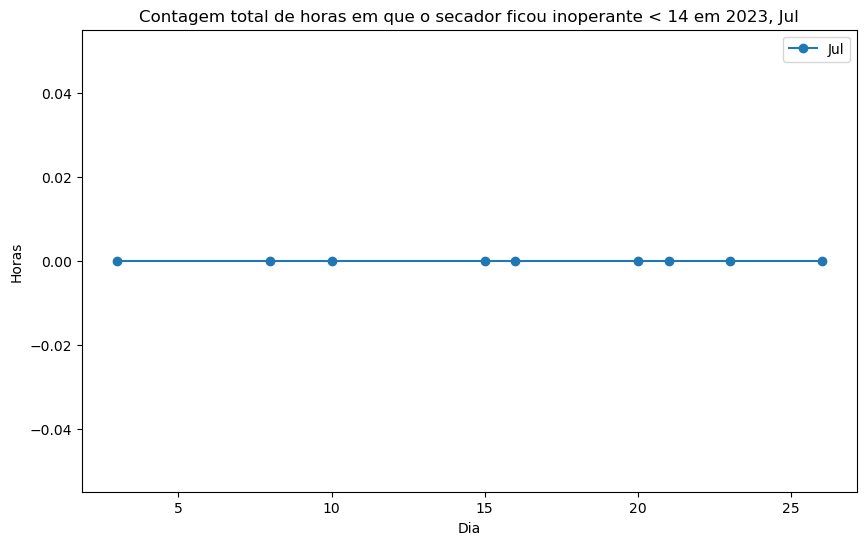

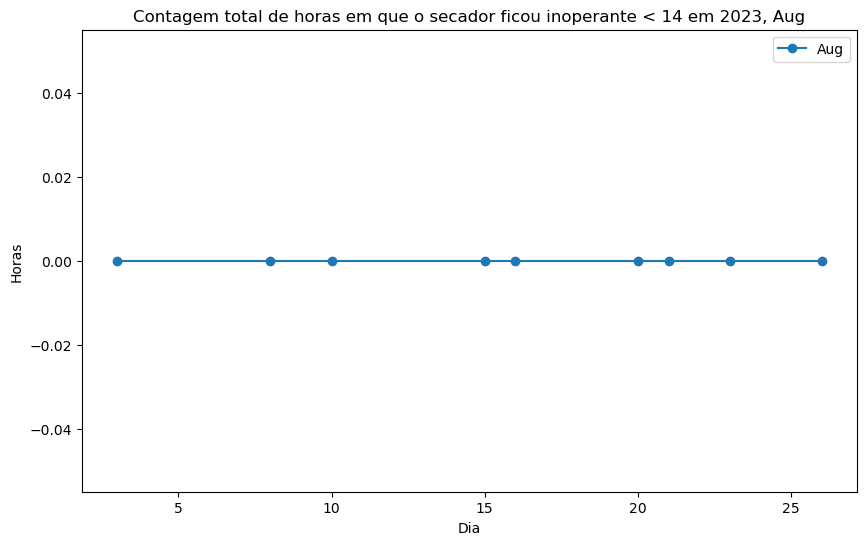

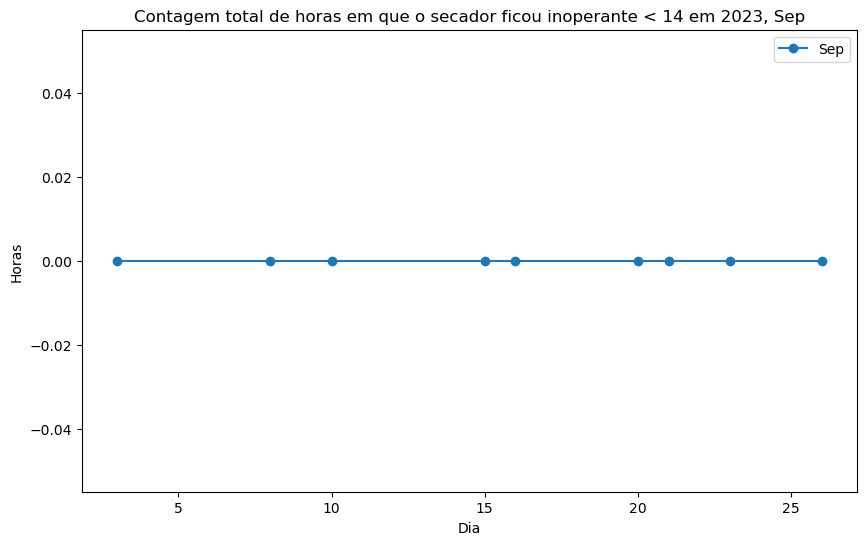

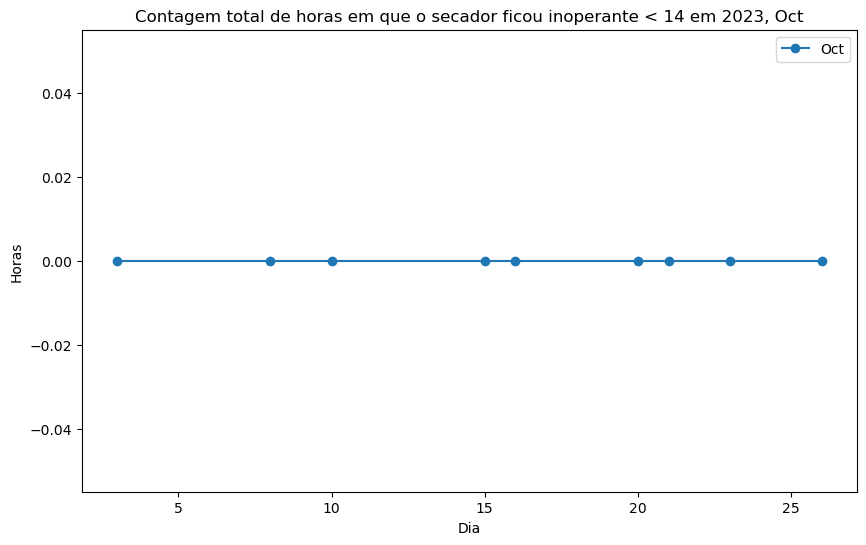

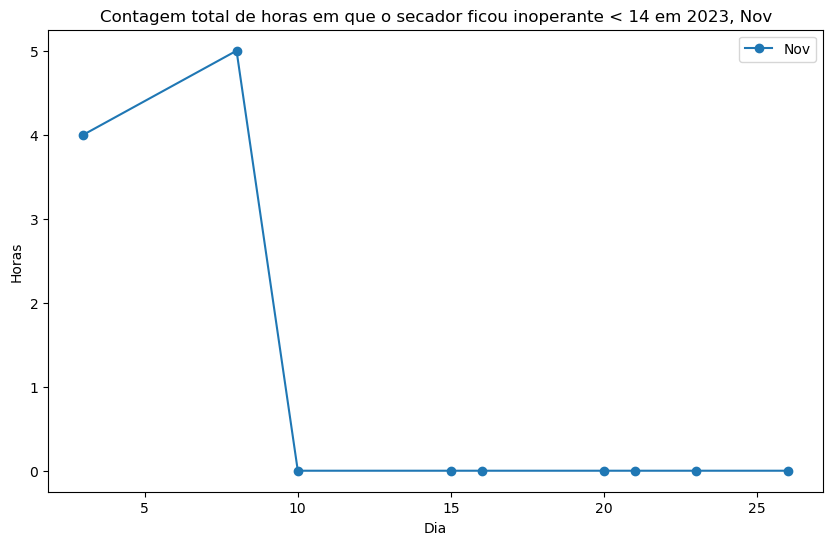

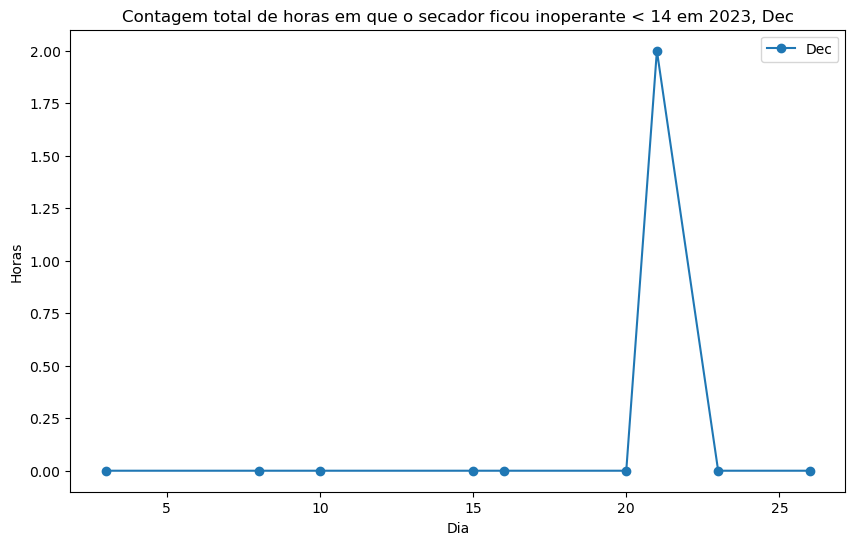

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\3663257727.py:25: FutureWarning: The default of observed=False is depr

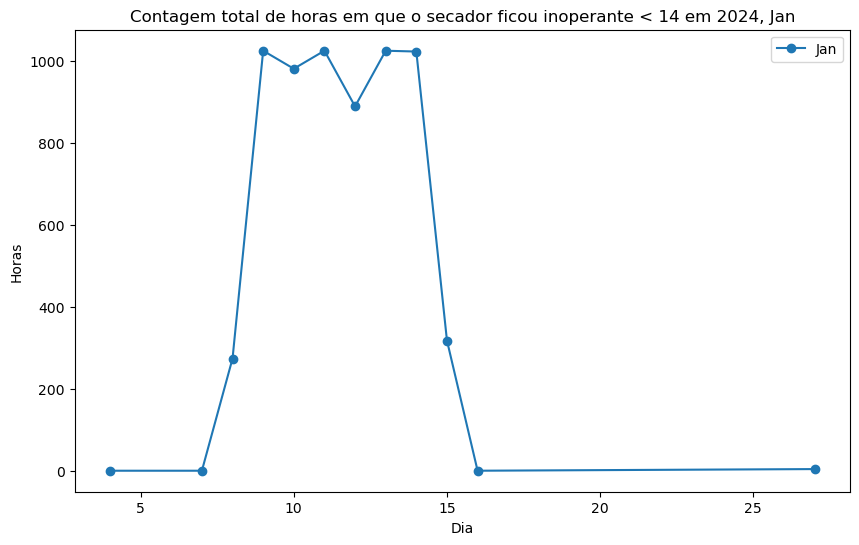

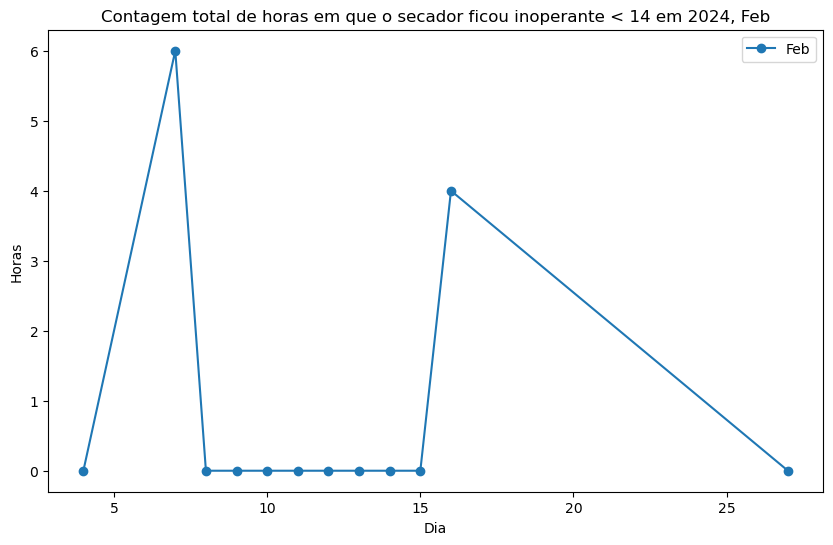

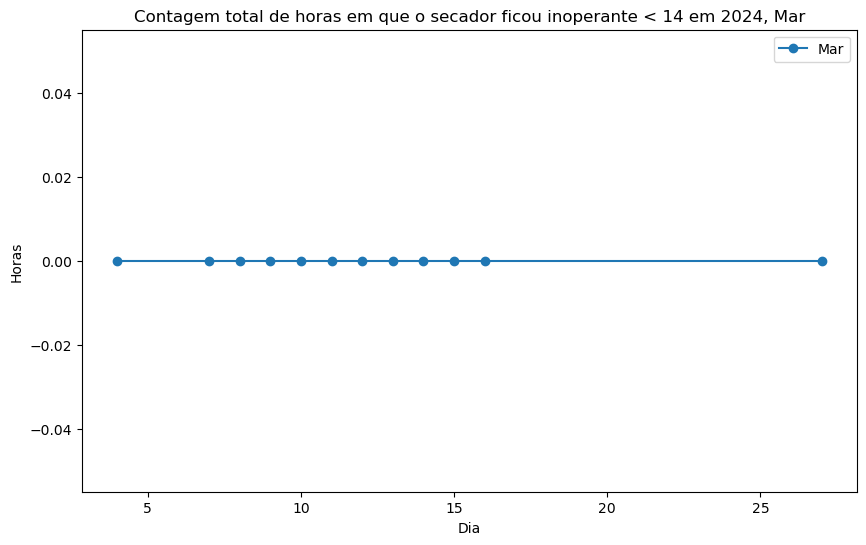

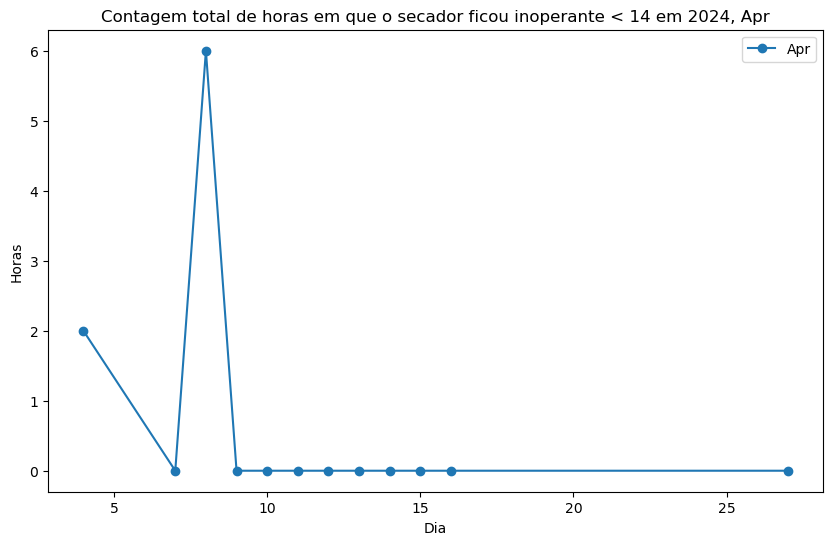

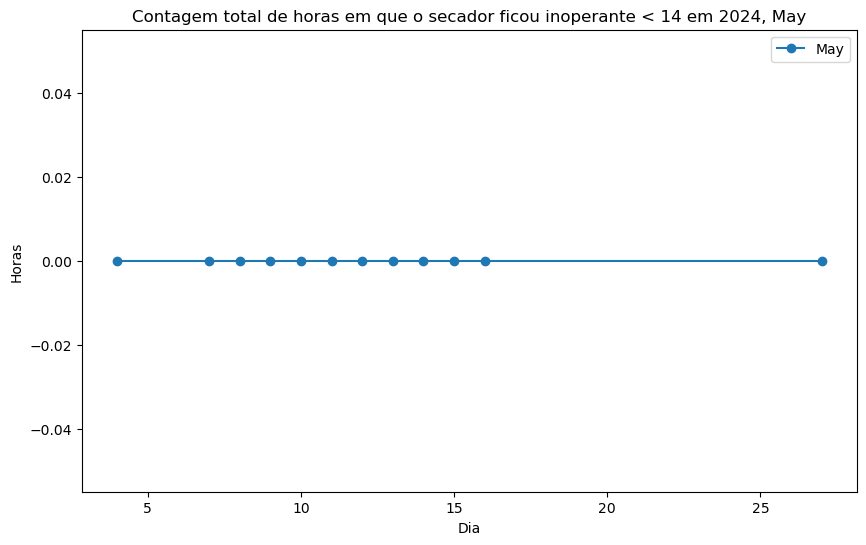

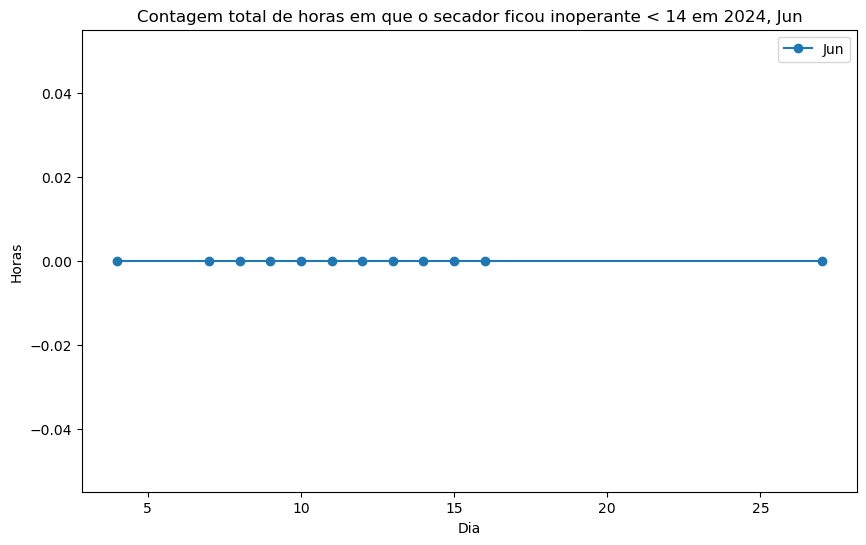

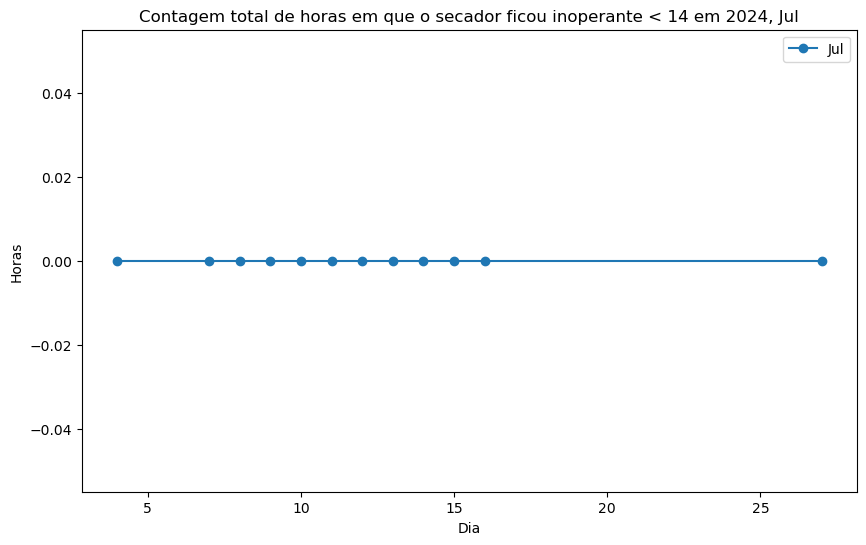

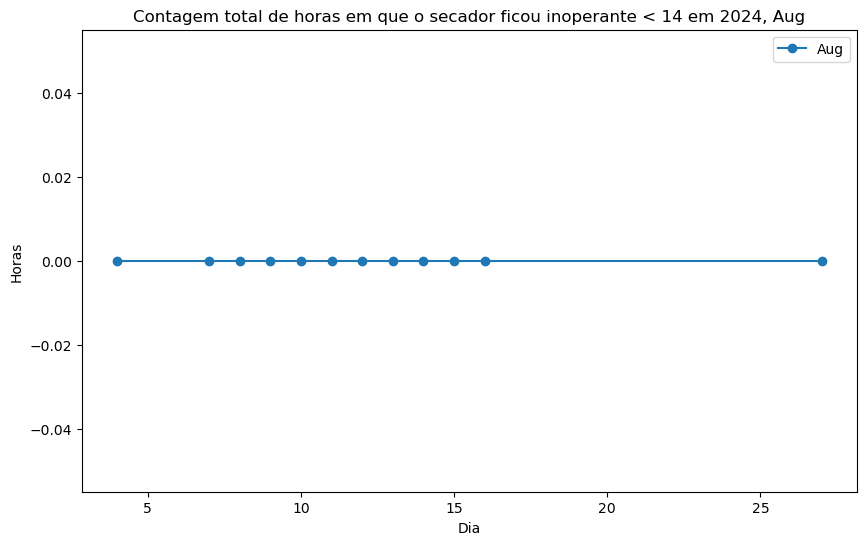

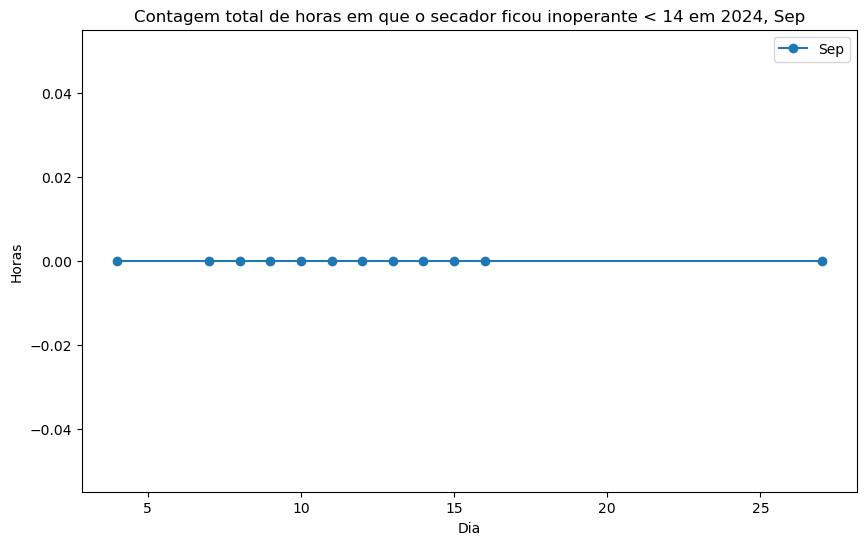

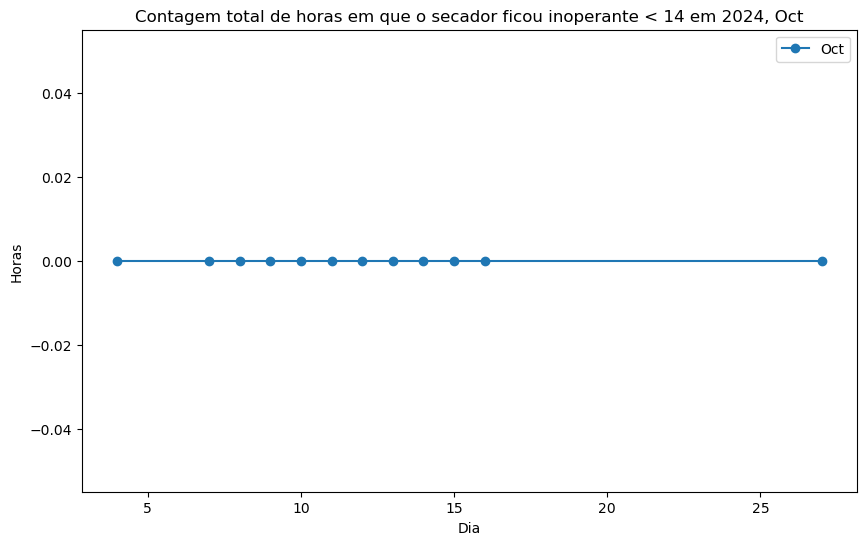

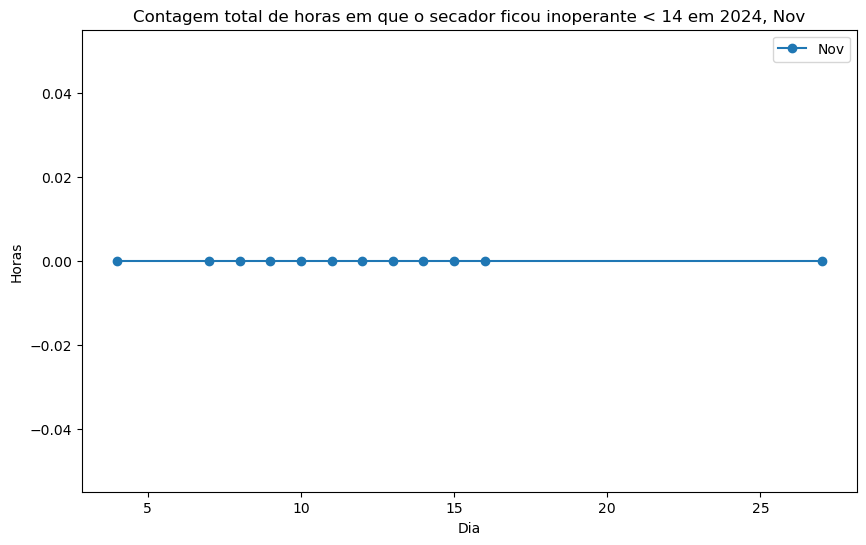

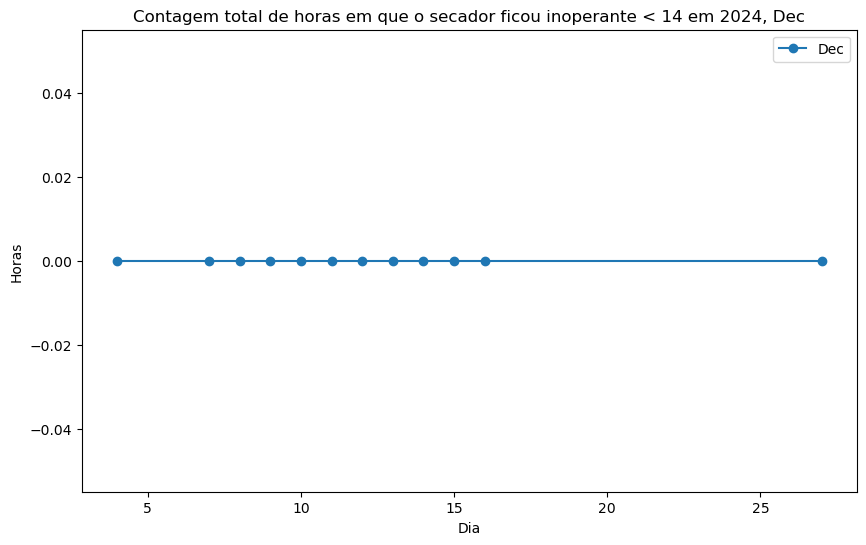

In [47]:

import calendar




# Obtendo os anos únicos
anos = df1['ano'].unique()

# Plotando um gráfico para cada ano
for ano in anos:
    df_ano = df1[df1['ano'] == ano]
    
    # Substituindo os números dos meses pelos nomes
    df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
    
    # Ordenando os meses
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_ano['mes'] = pd.Categorical(df_ano['mes'], categories=months, ordered=True)
    
    # Filtrando os valores onde 'G200AUT_PT325005' é menor que 14
    df_filtered = df_ano[df_ano['G200AUT_PT325005'] < 14]
    
    # Agrupando por mês e dia, e contando as horas
    df_grouped = df_filtered.groupby(['mes', 'dia'])['hora'].count().reset_index()
    
    # Plotando um gráfico para cada mês
    for mes in df_grouped['mes'].unique():
        df_mes = df_grouped[df_grouped['mes'] == mes]
        plt.figure(figsize=(10, 6))
        
        # Plotando a linha
        plt.plot(df_mes['dia'], df_mes['hora'], marker='o', label=mes)
        
        plt.title(f'Contagem total de horas em que o secador ficou inoperante < 14 em {ano}, {mes}')
        plt.xlabel('Dia')
        plt.ylabel('Horas')
        plt.legend()

        # Salva a figura como um arquivo PDF
        plt.savefig(f'horas_{ano}_{mes}.pdf')

        plt.show()



In [ ]:
convert_to_int(df_grouped, ['G200AUT_PT325005'])

In [49]:
# Agrupar por 'ano' e 'mes' e obter o valor máximo de 'G200AUT_PT325005' para cada grupo
df_grouped_max = df1.groupby(['ano', 'mes'])['G200AUT_PT325005'].max().reset_index()

# Imprimir o novo DataFrame
print(df_grouped_max)



     ano  mes  G200AUT_PT325005
0   2021    1             13.58
1   2021    3             13.53
2   2021    4             11.87
3   2021    7             12.63
4   2021    8             11.08
5   2021   11             13.18
6   2021   12             13.89
7   2022    1             13.76
8   2022    2             12.16
9   2022    3             13.91
10  2022    4             13.76
11  2022    5             11.88
12  2022    6             13.89
13  2022   10             12.83
14  2022   12             13.23
15  2023    1             13.11
16  2023    2              6.66
17  2023    3             13.97
18  2023    6             10.65
19  2023   11             13.48
20  2023   12              9.29
21  2024    1             13.75
22  2024    2             10.81
23  2024    4             13.32


C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2480971591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


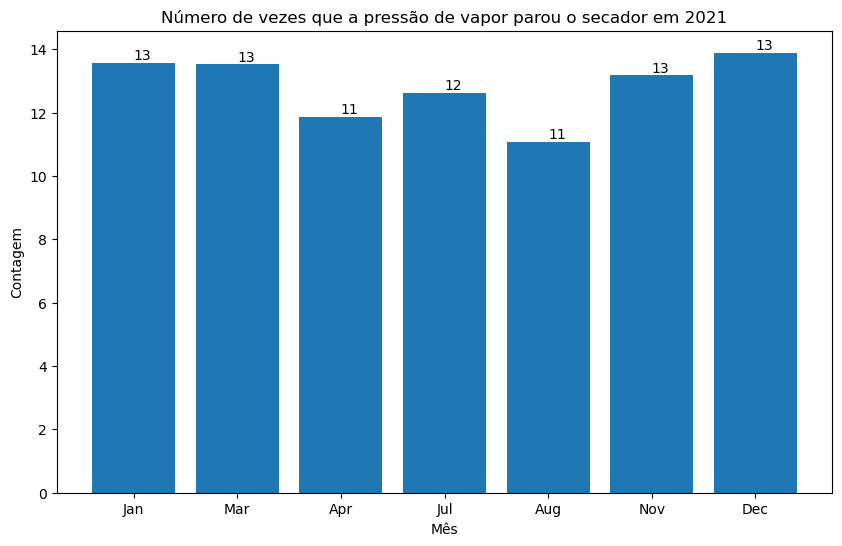

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2480971591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


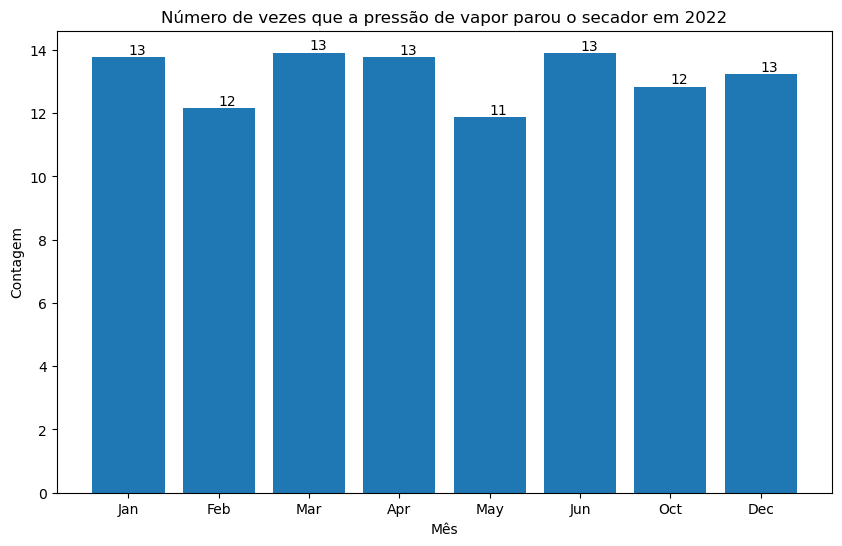

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2480971591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


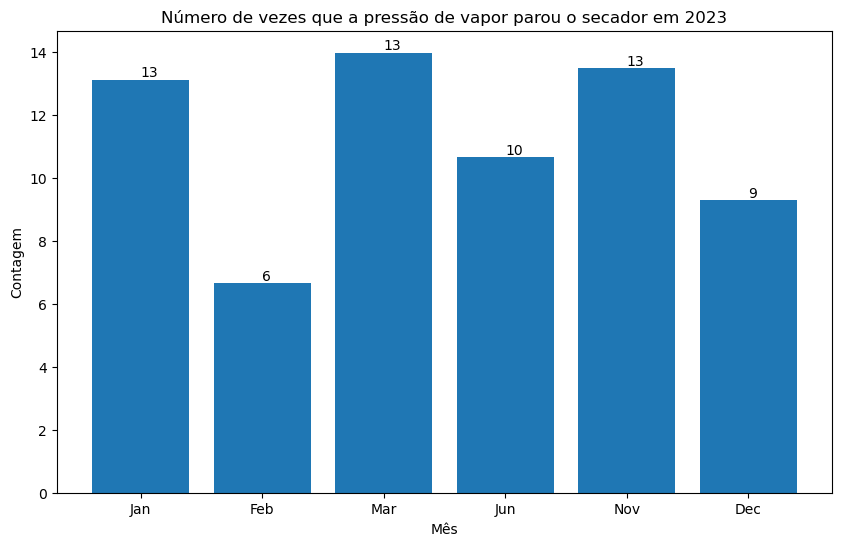

C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_20064\2480971591.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])


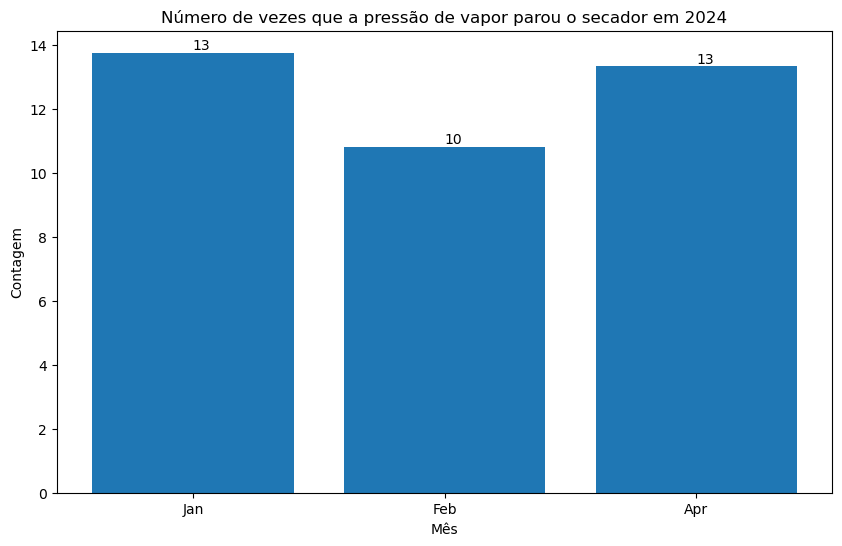

In [50]:

import calendar



# Obtendo os anos únicos
anos = df_grouped_max['ano'].unique()

# Plotando um gráfico para cada ano
for ano in anos:
    df_ano = df_grouped_max[df_grouped_max['ano'] == ano]
    
    # Substituindo os números dos meses pelos nomes
    df_ano['mes'] = df_ano['mes'].apply(lambda x: calendar.month_abbr[x])
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_ano['mes'], df_ano['G200AUT_PT325005'])
    plt.title(f'Número de vezes que a pressão de vapor parou o secador em {ano}')
    plt.xlabel('Mês')
    plt.ylabel('Contagem')

    # Adicionando rótulos de dados
    max_height = max(bar.get_height() for bar in bars)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # posiciona o rótulo no topo da barra

    # Salva a figura como um arquivo PDF
    plt.savefig(f'numerodeocorrencias_{ano}.pdf')

    plt.show()

